<a href="https://colab.research.google.com/github/mauriciozanotti85-ui/Generos-Musicales/blob/main/proyectodspartei_zanotti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduccion**:

El proposito del siguiente trabajo es determinar si el exito de una cancion esta relacionado si la misma es  mas instumental o por la duracion de la letra. Tambien se consideraran otros factores entre estas dos variables como si es mas bailable, sonoridad, acustica, etc.

El dataset proviene de la empresa de streaming Spotify, los mismos provienen de Kaggle disponiblen en el siguiente enlace: https://www.kaggle.com/datasets/purumalgi/music-genre-classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("purumalgi/music-genre-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'music-genre-classification' dataset.
Path to dataset files: /kaggle/input/music-genre-classification


In [ ]:
import chardet
import os

file_path = os.path.join(path, 'train.csv')

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [ ]:
import pandas as pd
import numpy as np
import os

file_path = os.path.join(path, 'train.csv')
df = pd.read_csv(file_path, encoding='utf-8')
df.head(20)

Artist Name                             Track Name  \
0                     Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                         Boston                           Hitch a Ride   
2                  The Raincoats                     No Side to Fall In   
3                           Deno             Lingo (feat. J.I & Chunkz)   
4          Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
5                    The Stooges      Search and Destroy - Iggy Pop Mix   
6                  Solomon Burke                    None Of Us Are Free   
7                   Randy Travis                      On the Other Hand   
8      Professional Murder Music                                   Slow   
9                    Dudu Aharon        ◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î   
10                 Mohammed Rafi                   Meri Dosti Mera Pyar   
11                Arctic Monkeys            The View From The Afternoon   
12                    Eyal Golan                    ◊ß◊®◊ï◊ë◊î ◊ê◊ú◊ô◊ô   
13  Harald Lassen, Bram de Looze                     How it feels pt. 2   
14           Buffalo Springfield                    For What It's Worth   
15                  Elmore James                          Madison Blues   
16                   Dudu Aharon           ◊ú◊ê ◊ô◊õ◊ï◊ú ◊ë◊ú◊¢◊ì◊ô◊ô◊ö   
17            Velvet Two Stripes                                 Drinks   
18                Eden Ben Zaken                           ◊û◊†◊í◊ô◊†◊î   
19                        DaBaby             Baby Sitter (feat. Offset)   

    Popularity  danceability  energy   key  loudness  mode  speechiness  \
0         60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1         54.0         0.382   0.814   3.0    -7.230     1       0.0406   
2         35.0         0.434   0.614   6.0    -8.334     1       0.0525   
3         66.0         0.853   0.597  10.0    -6.528     0       0.0555   
4         53.0         0.167   0.975   2.0    -4.279     1       0.2160   
5         53.0         0.235   0.977   6.0     0.878     1       0.1070   
6         48.0         0.674   0.658   5.0    -9.647     0       0.1040   
7         55.0         0.657   0.415   5.0    -9.915     1       0.0250   
8         29.0         0.431   0.776  10.0    -5.403     1       0.0527   
9         14.0         0.716   0.885   1.0    -4.348     0       0.0333   
10        11.0         0.491   0.563   7.0    -8.588     0       0.0331   
11        59.0         0.387   0.922   9.0    -5.192     0       0.0674   
12        34.0         0.585   0.381   1.0    -7.622     0       0.0463   
13        34.0         0.462   0.374  11.0   -12.069     0       0.0331   
14        76.0         0.653   0.519   2.0   -10.164     1       0.0497   
15        37.0         0.431   0.852   2.0    -6.522     1       0.0431   
16        14.0         0.713   0.939   5.0    -3.609     0       0.0372   
17        31.0         0.564   0.801   1.0    -4.730     0       0.0473   
18        29.0         0.570   0.458   9.0    -5.935     0       0.0236   
19        70.0         0.852   0.730   1.0    -5.803     1       0.0579   

    acousticness  instrumentalness  liveness  valence    tempo  \
0       0.017100               NaN    0.0849   0.8990  134.071   
1       0.001100          0.004010    0.1010   0.5690  116.454   
2       0.486000          0.000196    0.3940   0.7870  147.681   
3       0.021200               NaN    0.1220   0.5690  107.033   
4       0.000169          0.016100    0.1720   0.0918  199.060   
5       0.003530          0.006040    0.1720   0.2410  152.952   
6       0.404000          0.000001    0.0981   0.6770  143.292   
7       0.175000          0.000006    0.1320   0.3470   96.030   
8       0.000022          0.001300    0.1790   0.3180  120.857   
9       0.061400               NaN    0.2530   0.8330  128.043   
10      0.957000          0.002300    0.2630   0.8430   95.558   
11      0.004870               NaN    0.1870   0.4170  146.478   
12      0.4

## **Descripción del Dataset:**

### Descripción de cada columna:

Artist Name : nombre del artista vinculado a cada tema músical.

Track Name : nombre del tema músical.

Popularity : Indica la popularidad de cada tema músical. Los valores son del 1 al 100.

danceability: el indice señala qué tan apta es una canción para bailar. Este valor se basa en una combinación de elementos musicales como el tiempo, la estabilidad rítmica, la intensidad del pulso y la regularidad general. Los valores de danceability van de 0.0 (min bailable) hasta 1.0 (max bailable).

energy: nivel de energía de cada tema musical. Con valores del 0 al 1.

key : muestra el tono de cada tema. Con valores del 1 al 10.

loudness: medida de la sonoridad de una canción que tiene en cuenta la percepción humana y la intensidad de la señal eléctrica.

speechiness: presencia de palabras habladas en el tema

acousticness : acousticness de una canción es una medida de confianza que indica si la pista es acústica, en una escala de 0,0 a 1,0. Un valor de 1,0 indica una alta confianza de que la pista es acústica.

instrumentalness: indica la relación entre la parte instrumental y la vocal de la canción. Los temas que tienen voz e instrumentos suelen tener un valor de instrumentalness entre 0.0 y 0.1.

liveness: indica la presencia de público en la grabación. Los valores de liveness más altos indican que es más probable que la canción se haya interpretado en vivo

valence :es la configuración de los niveles de tonos agudos y bajos que se puede ajustar con el ecualizado tempo

duration_in min/ms: duración de la canción

time_signature:es una convención de notación que indica la cantidad de golpes que hay en cada barra o medida. El rango de la time signature va de 3 a 7, indicando "3/4" a "7/4"

Class: es un código que indica el genero de la canción.

Genero: nombre del genero de la canción.

### **Exploracion de Datos:**

In [ ]:
import pandas as pd
import numpy as np
import os

file_path = os.path.join(path, 'train.csv')
df = pd.read_csv(file_path)
len(df)

17996

In [ ]:
import pandas as pd
import numpy as np
import os

file_path = os.path.join(path, 'train.csv')
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

El Dataset no posee valores nulos

In [ ]:
df.duplicated().value_counts()

False    17996
Name: count, dtype: int64

El dataset no posee filas repetidas.

In [ ]:
df.describe().round(1)

Popularity  danceability   energy      key  loudness     mode  \
count     17568.0       17996.0  17996.0  15982.0   17996.0  17996.0   
mean         44.5           0.5      0.7      6.0      -7.9      0.6   
std          17.4           0.2      0.2      3.2       4.0      0.5   
min           1.0           0.1      0.0      1.0     -40.0      0.0   
25%          33.0           0.4      0.5      3.0      -9.5      0.0   
50%          44.0           0.5      0.7      6.0      -7.0      1.0   
75%          56.0           0.7      0.9      9.0      -5.2      1.0   
max         100.0           1.0      1.0     11.0       1.4      1.0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
count      17996.0       17996.0           13619.0   17996.0  17996.0   
mean           0.1           0.2               0.2       0.2      0.5   
std            0.1           0.3               0.3       0.2      0.2   
min            0.0           0.0               0.0       0.0      0.0   
25%            0.0           0.0               0.0       0.1      0.3   
50%            0.0           0.1               0.0       0.1      0.5   
75%            0.1           0.4               0.2       0.3      0.7   
max            1.0           1.0               1.0       1.0      1.0   

         tempo  duration_in min/ms  time_signature    Class  
count  17996.0             17996.0         17996.0  17996.0  
mean     122.6            200744.5             3.9      6.7  
std       29.6            111989.1             0.4      3.2  
min       30.6                 0.5             1.0      0.0  
25%       99.6            166337.0             4.0      5.0  
50%      120.1            209160.0             4.0      8.0  
75%      142.0            252490.0             4.0     10.0  
max      217.4           1477187.0             5.0     10.0

# Columnas Categoricas:

In [ ]:
df.describe(include = 'object').T

count unique              top freq
Artist Name  17996   9149  Backstreet Boys   69
Track Name   17996  15129           Dreams    9

# Columnas Numericas:

In [ ]:
df.describe().T

count           mean            std        min  \
Popularity          17568.0      44.512124      17.426928   1.000000   
danceability        17996.0       0.543433       0.166268   0.059600   
energy              17996.0       0.662777       0.235373   0.000020   
key                 15982.0       5.952447       3.196854   1.000000   
loudness            17996.0      -7.910660       4.049151 -39.952000   
mode                17996.0       0.636753       0.480949   0.000000   
speechiness         17996.0       0.079707       0.083576   0.022500   
acousticness        17996.0       0.247082       0.310632   0.000000   
instrumentalness    13619.0       0.177562       0.304048   0.000001   
liveness            17996.0       0.196170       0.159212   0.011900   
valence             17996.0       0.486208       0.240195   0.018300   
tempo               17996.0     122.623294      29.571527  30.557000   
duration_in min/ms  17996.0  200744.458851  111989.127131   0.501650   
time_signature      17996.0       3.924039       0.361618   1.000000   
Class               17996.0       6.695821       3.206073   0.000000   

                              25%           50%           75%          max  
Popularity              33.000000      44.00000      56.00000      100.000  
danceability             0.432000       0.54500       0.65900        0.989  
energy                   0.509000       0.70000       0.86000        1.000  
key                      3.000000       6.00000       9.00000       11.000  
loudness                -9.538000      -7.01600      -5.18900        1.355  
mode                     0.000000       1.00000       1.00000        1.000  
speechiness              0.034800       0.04740       0.08300        0.955  
acousticness             0.004300       0.08140       0.43400        0.996  
instrumentalness         0.000089       0.00391       0.20000        0.996  
liveness                 0.097500       0.12900       0.25800        1.000  
valence                  0.297000       0.48100       0.67200        0.986  
tempo                   99.620750     120.06550     141.96925      217.416  
duration_in min/ms  166337.000000  209160.00000  252490.00000  1477187.000  
time_signature           4.000000       4.00000       4.00000        5.000  
Class                    5.000000       8.00000      10.00000       10.000

In [ ]:
df.Popularity.unique()

array([ 60.,  54.,  35.,  66.,  53.,  48.,  55.,  29.,  14.,  11.,  59.,
        34.,  76.,  37.,  31.,  70.,  44.,  nan,  73.,  30.,  81.,   4.,
        49.,  42.,  16.,  47.,  63.,  65.,  56.,  28.,  77.,  18.,   9.,
        41.,  20.,  38.,  26.,  24.,  68.,  43.,  57.,  79.,  71.,  33.,
        45.,  13.,  51.,  62.,   3.,  25.,  22.,  40.,  19.,  50.,  52.,
        10.,  32.,  69.,   7.,  21.,  23.,  17.,  58.,  39.,  90.,  99.,
        75.,  46.,  64.,  72.,  78.,  15.,  27.,  61.,   8.,  67.,  83.,
        87.,  93.,  12.,  82.,  80.,   1.,  36.,  88.,  74.,   2.,   6.,
         5.,  86.,  89.,  98.,  84.,  91.,  85.,  95.,  92.,  94.,  96.,
        97., 100.])

In [ ]:
df.danceability.unique()

array([0.854 , 0.382 , 0.434 , 0.853 , 0.167 , 0.235 , 0.674 , 0.657 ,
       0.431 , 0.716 , 0.491 , 0.387 , 0.585 , 0.462 , 0.653 , 0.713 ,
       0.564 , 0.57  , 0.852 , 0.347 , 0.796 , 0.805 , 0.472 , 0.556 ,
       0.548 , 0.867 , 0.341 , 0.733 , 0.696 , 0.517 , 0.437 , 0.384 ,
       0.858 , 0.297 , 0.516 , 0.32  , 0.661 , 0.569 , 0.357 , 0.615 ,
       0.479 , 0.633 , 0.618 , 0.881 , 0.624 , 0.607 , 0.799 , 0.494 ,
       0.52  , 0.595 , 0.523 , 0.566 , 0.612 , 0.63  , 0.521 , 0.501 ,
       0.185 , 0.532 , 0.415 , 0.425 , 0.373 , 0.39  , 0.439 , 0.827 ,
       0.709 , 0.583 , 0.704 , 0.247 , 0.801 , 0.539 , 0.907 , 0.667 ,
       0.436 , 0.366 , 0.777 , 0.54  , 0.435 , 0.288 , 0.562 , 0.683 ,
       0.411 , 0.49  , 0.374 , 0.593 , 0.809 , 0.748 , 0.529 , 0.543 ,
       0.644 , 0.467 , 0.514 , 0.381 , 0.762 , 0.576 , 0.61  , 0.117 ,
       0.86  , 0.766 , 0.697 , 0.407 , 0.744 , 0.545 , 0.266 , 0.645 ,
       0.508 , 0.579 , 0.426 , 0.449 , 0.698 , 0.691 , 0.58  , 0.565 ,
      

In [ ]:
df.energy.unique()

array([0.564 , 0.814 , 0.614 , ..., 0.0773, 0.0995, 0.0835])

In [ ]:
df.key.unique()

array([ 1.,  3.,  6., 10.,  2.,  5.,  7.,  9., 11.,  8., nan,  4.])

In [ ]:
df.loudness.unique()

array([ -4.964,  -7.23 ,  -8.334, ..., -11.621, -25.131, -12.757])

In [ ]:
df.speechiness.unique()

array([0.0485, 0.0406, 0.0525, ..., 0.44  , 0.52  , 0.49  ])

In [ ]:
df.acousticness.unique()

array([1.71e-02, 1.10e-03, 4.86e-01, ..., 6.87e-04, 9.80e-05, 2.97e-05])

In [ ]:
df.instrumentalness.unique()

array([     nan, 4.01e-03, 1.96e-04, ..., 6.58e-04, 7.51e-05, 8.39e-04])

In [ ]:
df.liveness.unique()

array([0.0849, 0.101 , 0.394 , ..., 0.0522, 0.815 , 0.814 ])

In [ ]:
df.valence.unique()

array([0.899 , 0.569 , 0.787 , ..., 0.0944, 0.0364, 0.0425])

In [ ]:
import pandas as pd
import re
import os # Ensure os is imported

# --- 1. Cargar DataFrames ---
file_path_train = os.path.join(path, 'train.csv')
df_train = pd.read_csv(file_path_train)

# Cargar submission.csv
submission_file_path = os.path.join(path, 'submission.csv')
df_submission = pd.read_csv(submission_file_path)

# --- 2. Crear el Mapeo de CLASE a GÉNERO desde submission.csv ---
# Extraemos los nombres de las columnas que contienen la llave y el nombre del género
columnas_genero = df_submission.columns.tolist()

# Crear un diccionario y luego un DataFrame de mapeo
mapeo_genero = {}
for col in columnas_genero:
    # El patrón busca "Nombre_Genero" + "_" + "Numero_Clase"
    match = re.match(r'(.+)_(\d+)', col)
    if match:
        # Extraer el nombre del género y reemplazar guiones bajos por espacios
        genre_name = match.group(1).replace('_', ' ')
        # Extraer el número de clase
        class_number = int(match.group(2))
        mapeo_genero[class_number] = genre_name

# Convertir el diccionario a un DataFrame de mapeo (la tabla de referencia)
df_mapa = pd.DataFrame(
    list(mapeo_genero.items()),
    columns=['Class', 'Genre_Name']
)
df_mapa['Class'] = df_mapa['Class'].astype(int)


# --- 3. Vincular (Merge) el mapa al DataFrame de entrenamiento ---
# Limpiar y asegurar que la columna 'Class' en train.csv sea numérica/entera
# Use pd.to_numeric with errors='coerce' to handle non-numeric values, then drop NA and convert to int.
df_train['Class'] = pd.to_numeric(df_train['Class'], errors='coerce').dropna().astype(int)

# Realizar la unión LEFT: mantenemos todas las canciones de train.csv
# y añadimos la columna 'Genre_Name' usando 'Class' como llave.
df_train_merged = pd.merge(
    left=df_train,
    right=df_mapa,
    on='Class',
    how='left'
)

# --- 4. Mostrar el Resultado ---
print("--- Vinculación Exitosa (Primeras 5 Filas) ---")
print(df_train_merged[['Artist Name', 'Track Name', 'Class', 'Genre_Name', 'Popularity']].head().to_markdown(index=False))

--- Vinculación Exitosa (Primeras 5 Filas) ---
| Artist Name           | Track Name                            |   Class | Genre_Name   |   Popularity |
|:----------------------|:--------------------------------------|--------:|:-------------|-------------:|
| Bruno Mars            | That's What I Like (feat. Gucci Mane) |       5 | HipHop       |           60 |
| Boston                | Hitch a Ride                          |      10 | Rock         |           54 |
| The Raincoats         | No Side to Fall In                    |       6 | Indie Alt    |           35 |
| Deno                  | Lingo (feat. J.I & Chunkz)            |       5 | HipHop       |           66 |
| Red Hot Chili Peppers | Nobody Weird Like Me - Remastered     |      10 | Rock         |           53 |


In [ ]:
# Agrupar por género y calcular la media de popularidad, speechiness y instrumentalness
grouped_df = df_train_merged.groupby('Genre_Name').agg({'Popularity': 'mean', 'speechiness': 'mean', 'instrumentalness': 'mean'})

# Mostrar el resultado
grouped_df

Popularity  speechiness  instrumentalness
Genre_Name                                              
Acoustic/Folk   38.105263     0.043510          0.099464
Alt Music       45.883185     0.067848          0.199239
Blues           32.911695     0.061240          0.097938
Bollywood       26.242268     0.078229          0.131430
Country         57.294278     0.041906          0.012675
HipHop          48.638596     0.232698          0.068779
Indie Alt       41.474843     0.067378          0.262643
Instrumental    41.506399     0.045550          0.740386
Metal           42.226674     0.088745          0.235927
Pop             50.355953     0.073761          0.049807
Rock            46.967914     0.060726          0.112833

### **Hipotesis Planteadas:**



1.   Los dos generos mas populares de musica son Country y Pop. Muy cerca esta el Hip Hop y el Rock.
2.   No existe una relacion entre las variables speechiness e instrumentalness. Entre la variable Popularity e instrumentalness existe una relacion inversa, cuanto mas popular sea el genero menos instumental es el genero. En cuanto a la variable speechiness y Popularity no se observa relacion ni inversa ni directa.
3.   Se observo que el Hip Hop es el genero que mas speechhiness tiene, siendo el tercer genero mas popular.



/tmp/ipython-input-44791390.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




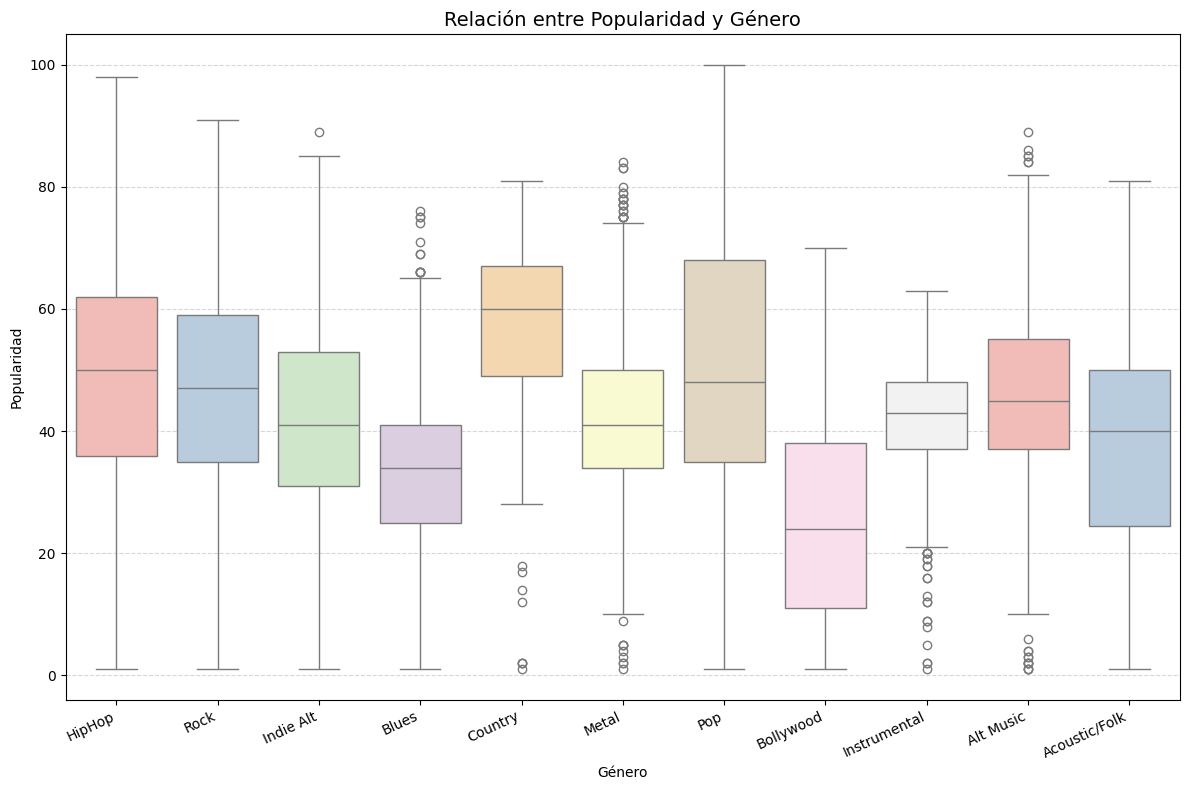

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre_Name', y='Popularity', data=df_train_merged, palette='Pastel1')
plt.title('Relación entre Popularidad y Género', fontsize=14)
plt.xlabel('Género', fontsize=10)
plt.ylabel('Popularidad', fontsize=10)
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Popularidad por Generos:**

**1. Popularidad promedio (mediana):** al observar la línea central de cada boxplot los géneros con mayor mediana de popularidad:

+Country

+Pop

+Alt Music

Estos géneros muestran una popularidad promedio más alta, la mayoría de sus canciones alcanzan valores relativamente elevados.

**2. Géneros de popularidad media:**

+HipHop

+Rock

+Indie Alt

+Acoustic/Folk

+Metal

Estos generos de moderadas medianas y distribuciones muy amplias, indica en el grafico mucha variabilidad (pueden ser muy porpulares o todo lo contrario)

**3. Variabilidad (dispersión)**
Los generos como el Rock, HipHop, Indie Alt, Metal, Alt Music, Acoustic/Folk
muestran rangos muy amplios, dentro del género hay tanto canciones poco populares como muy exitosas. Todo lo contrario con Instrumental, las canciones tienen niveles de popularidad parecidos.

**4. Outliers (canciones excepcionalmente populares)**

En su mayoria los géneros tienen outliers altos, llegando cerca de 100.

Esto indica que todos los géneros, incluso los de menor mediana, tienen la capacidad de producir canciones extremadamente exitosas.



Using Colab cache for faster access to the 'music-genre-classification' dataset.


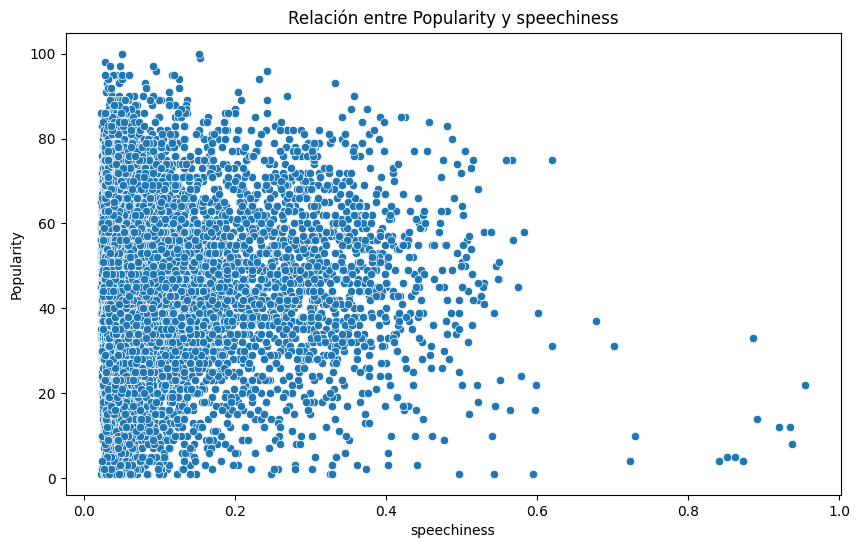

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import kagglehub

path = kagglehub.dataset_download("purumalgi/music-genre-classification")

file_path_train = os.path.join(path, 'train.csv')
df_train = pd.read_csv(file_path_train)

submission_file_path = os.path.join(path, 'submission.csv')
df_submission = pd.read_csv(submission_file_path)

columnas_genero = df_submission.columns.tolist()
mapeo_genero = {}
for col in columnas_genero:
    match = re.match(r'(.+)_(\d+)', col)
    if match:
        genre_name = match.group(1).replace('_', ' ')
        class_number = int(match.group(2))
        mapeo_genero[class_number] = genre_name

df_mapa = pd.DataFrame(
    list(mapeo_genero.items()),
    columns=['Class', 'Genre_Name']
)
df_mapa['Class'] = df_mapa['Class'].astype(int)

df_train['Class'] = pd.to_numeric(df_train['Class'], errors='coerce').dropna().astype(int)
df_train_merged = pd.merge(
    left=df_train,
    right=df_mapa,
    on='Class',
    how='left'
)
df = df_train_merged.copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='speechiness', y='Popularity')
plt.title('Relación entre Popularity y speechiness')
plt.xlabel('speechiness')
plt.ylabel('Popularity')
plt.show()

En el grafico parece mostrar que menos indice de speechiness mas popularidad tiene la cancion, pero no muestra ningun tipo de relacion cierta.

In [ ]:
correlation_coefficient = df['speechiness'].corr(df['Popularity'])

print(f"The correlation coefficient between speechiness and popularity is: {correlation_coefficient}")

The correlation coefficient between speechiness and popularity is: 0.031663822975772825


El coeficiente de Correlacion entre Speechiness y Popularity es nula o insignificante, por lo tanto se puede decir que no existe una relacion lineal entre las variables analizadas.  

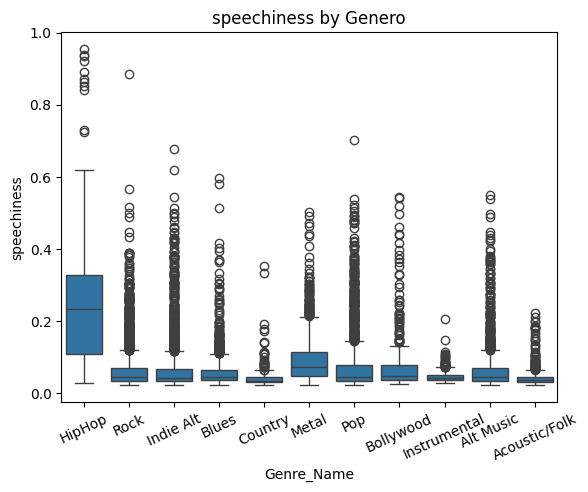

In [ ]:
import seaborn as sns

sns.boxplot(x='Genre_Name', y='speechiness', data=df)
plt.xlabel('Genre_Name')
plt.ylabel('speechiness')
plt.title('speechiness by Genero')
plt.xticks(rotation=25)
plt.show()

El HipHop es el único género con speechiness claramente mayor y distribuido más ampliamente. El resto de los generos musicales tienen un nivel bajo de contenido de voz, concentrados mas en la melodia. Tambien se puede visualizar la presencia de muchos valores atipicos.

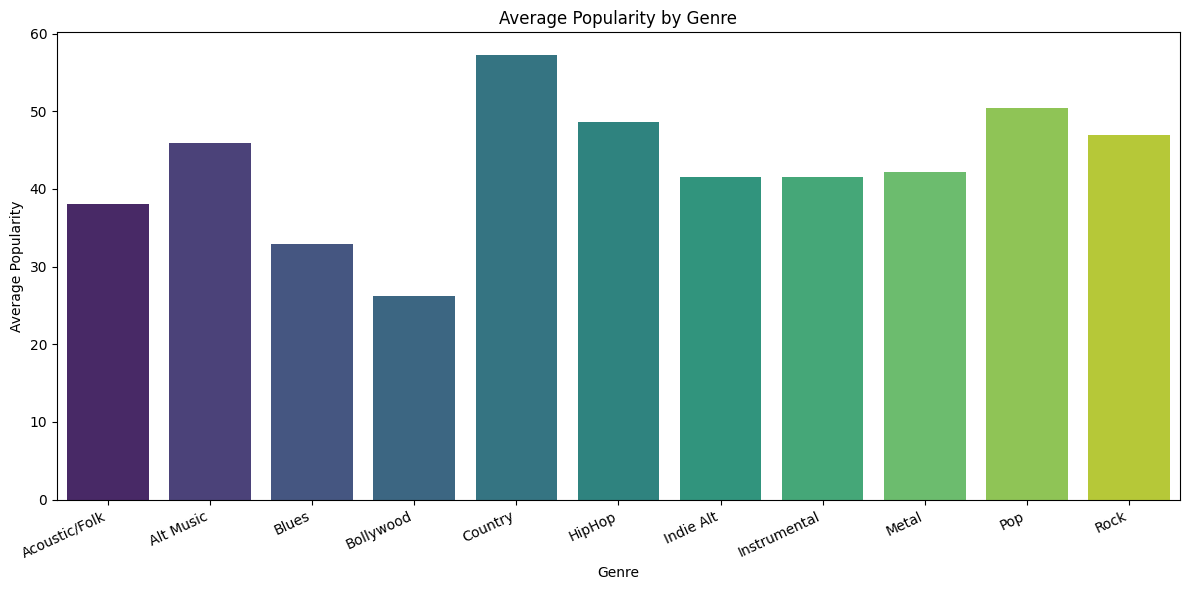

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

average_popularity_by_genre = df.groupby('Genre_Name')['Popularity'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_popularity_by_genre.index, y=average_popularity_by_genre.values, hue=average_popularity_by_genre.index, palette='viridis', legend=False)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

La musica Country posee la mayor popularidad promedio, en comparacion con los demas generos, seguidos por el Pop y Rock.

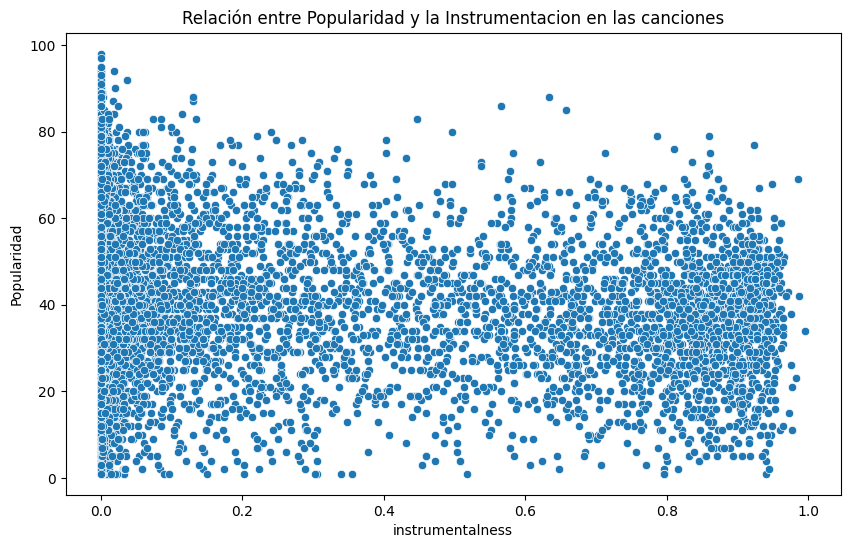

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='instrumentalness', y='Popularity')
plt.title('Relación entre Popularidad y la Instrumentacion en las canciones')
plt.xlabel('instrumentalness')
plt.ylabel('Popularidad')
plt.show()

No se observa una relacion lineal clara entre Instrumental y Popularidad de una cancion. Las canciones Instrumentales en cuanto a su Popularidad no depende significativamente de una cancion sea menos o mas instrumental. En valores altos de instrumentalness (≥ 0.8), hay menos puntos, indicando aunque pocas canciones son totalmente instrumentales, algunas alcanzan buena popularidad.

In [ ]:

correlation_coefficient = df['Popularity'].corr(df['instrumentalness'])

print(f"The correlation coefficient between popularity and instrumentalness is: {correlation_coefficient}")

The correlation coefficient between popularity and instrumentalness is: -0.16766106446827464


Ahora a diferencia del analisis de correlacion anterior speechiness-popularity, entre las variables Instrumental y Popularidad se puede observar una relacion lineal inversa debil, esto indica que menos instrumental sea un tema musical mas popular es.

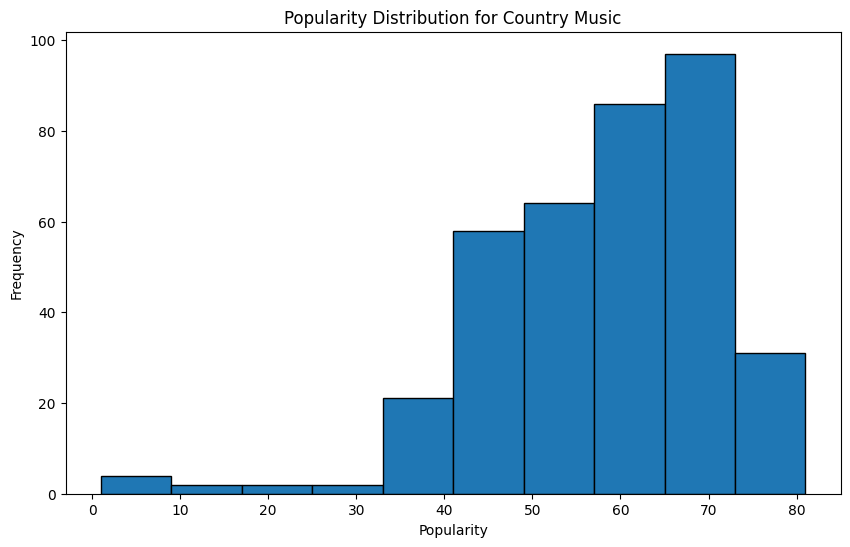

In [ ]:
Country_df = df[df['Genre_Name'] == 'Country']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(Country_df['Popularity'], bins=10, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution for Country Music')
plt.show()

El Genero Country posee una popularidad aprox los 32-72 puntos

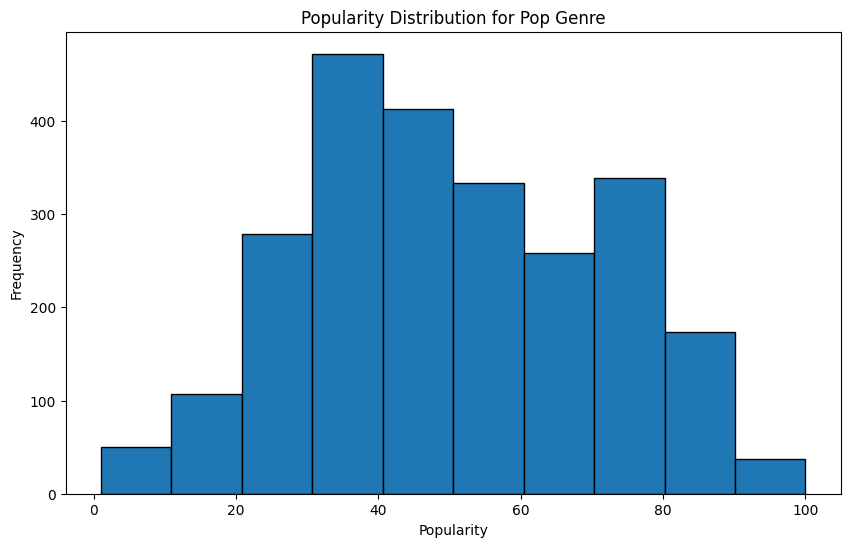

In [ ]:
pop_9_df = df[df['Genre_Name'] == 'Pop']

plt.figure(figsize=(10, 6))
plt.hist(pop_9_df['Popularity'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution for Pop Genre')
plt.show()

La mayoria de las canciones Pop posee una popularidad entre los 20 y 90

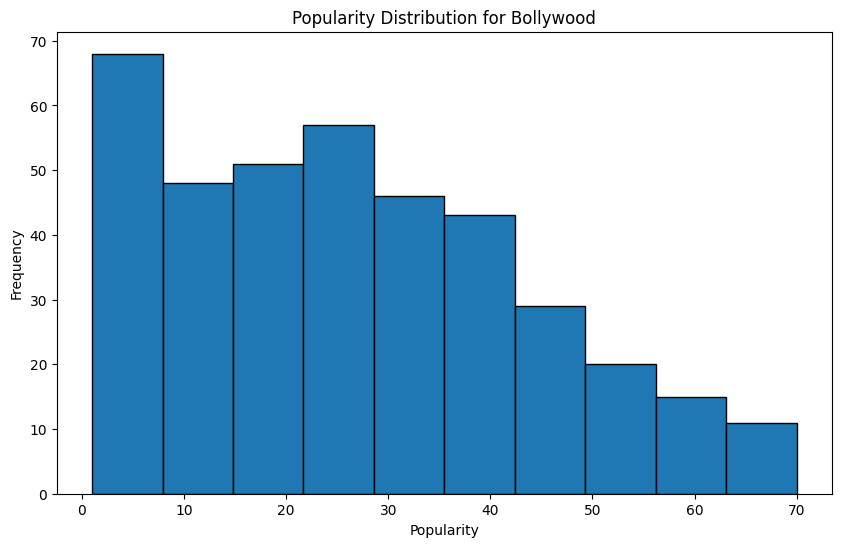

In [ ]:
pop_9_df = df[df['Genre_Name'] == 'Bollywood']

plt.figure(figsize=(10, 6))
plt.hist(pop_9_df['Popularity'], bins=10, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution for Bollywood')
plt.show()

En el caso de la musica de Bollywood posee una popularidad que va de 0 hasta algunos casos por encima de 60. Con estas graficas se puede obser que la musica country presenta valores por encima de los 32 puntos promedio de popularidad.

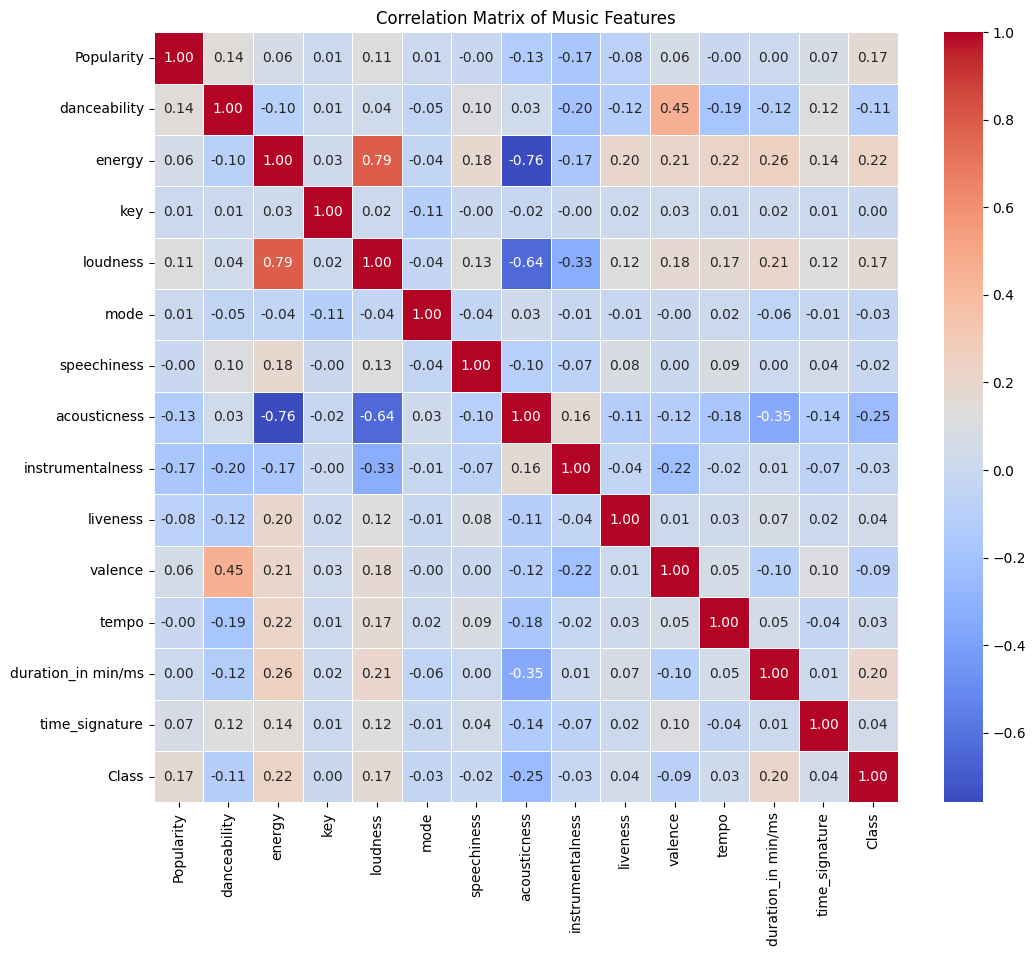

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    'Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class']

# Use df_train_merged directly to avoid NameError if df was not explicitly set in the current session
correlation_data = df_train_merged[numeric_cols].copy()

# Handle missing values: drop rows where any of these columns have NaN
# 'Popularity', 'key', and 'instrumentalness' were identified as having NaNs
# Dropping rows with NaNs is crucial for accurate correlation calculation.
correlation_data = correlation_data.dropna()

cor_spoti = correlation_data.corr()

# Visualize the correlation matrix using seaborn.heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cor_spoti, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Music Features')
plt.show()

En la matriz se puede observar que no hay muchas variables con una correlacion muy alta. Se puede ver que entre Energy y Loudness un indice de 0.79 positiva. En sentido inverso se -0.76 entre las variables acousticness y energy.

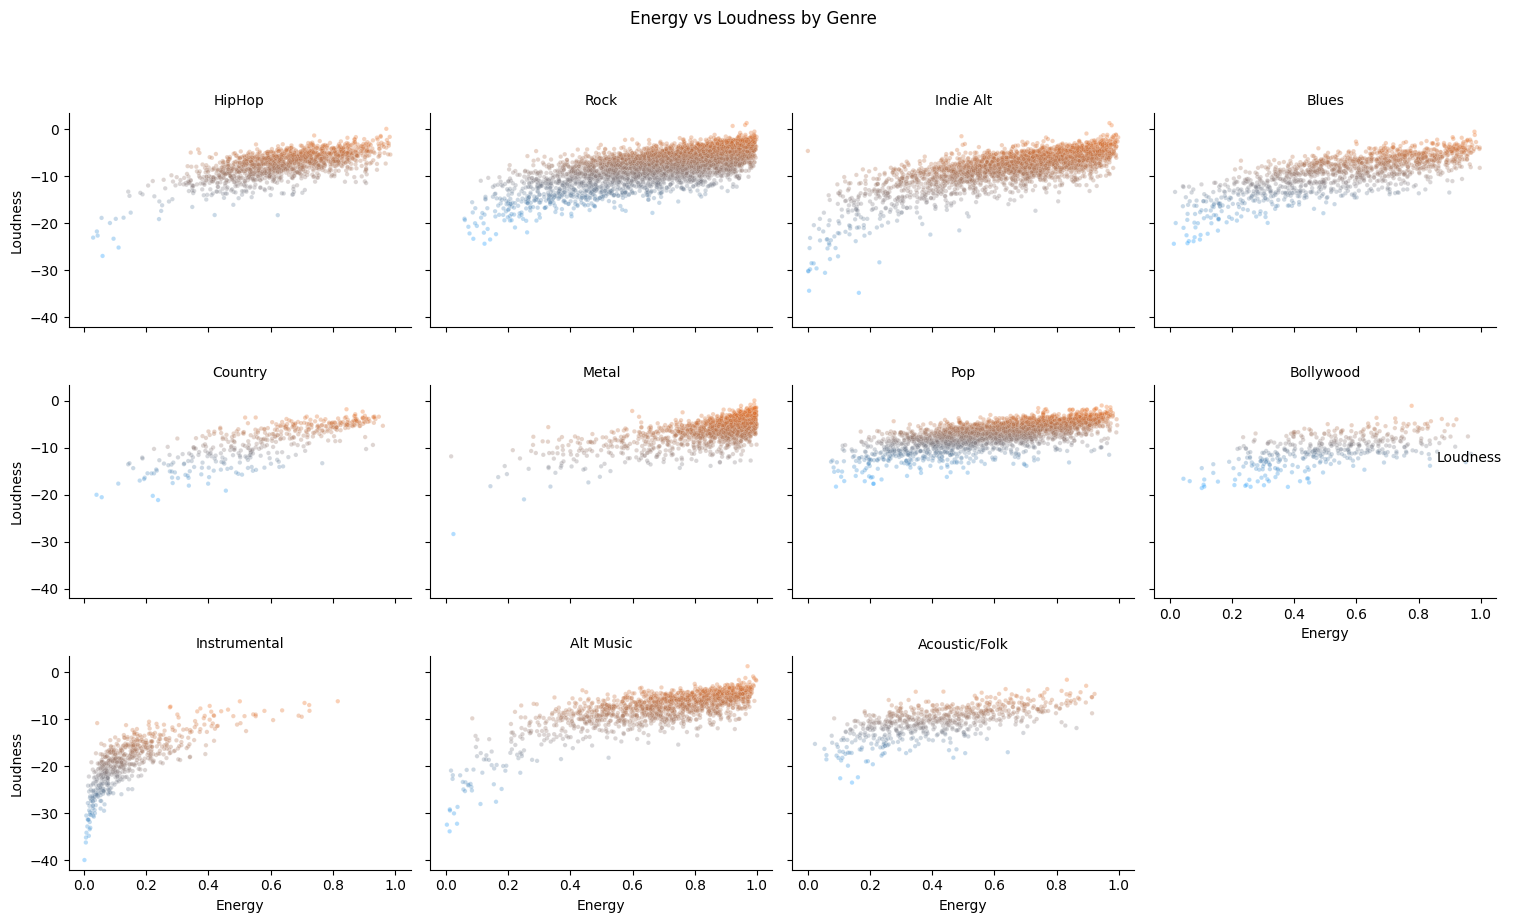

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

colors_list = ["#0091ff", "#f0650e"]
custom_cmap = LinearSegmentedColormap.from_list("custom_blue_orange", colors_list)

g = sns.FacetGrid(df, col="Genre_Name", col_wrap=4, height=3, aspect=1.2, sharex=True, sharey=True)

g.map_dataframe(sns.scatterplot, x="energy", y="loudness", hue="loudness",
                palette=custom_cmap, s=10, alpha=0.3, legend=False)

# Add a single legend for the hue ('loudness') to the entire FacetGrid
g.add_legend(title="Loudness")

# Set titles for each facet and overall axis labels
g.set_axis_labels("Energy", "Loudness")
g.set_titles(col_template="{col_name}")

# Add a main title for the entire plot
plt.suptitle("Energy vs Loudness by Genre", y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent main title overlap
plt.show()

En las anterior grafica se puede observar las variables Loudness y Energy en cada uno de los generos musicales. Se puede observar como generos como el Metal, Alt Music, Hip Hop, Indie Alt y Pop presentan mayores valores positivos entre esta correlacion de variables.

Original number of features: 13


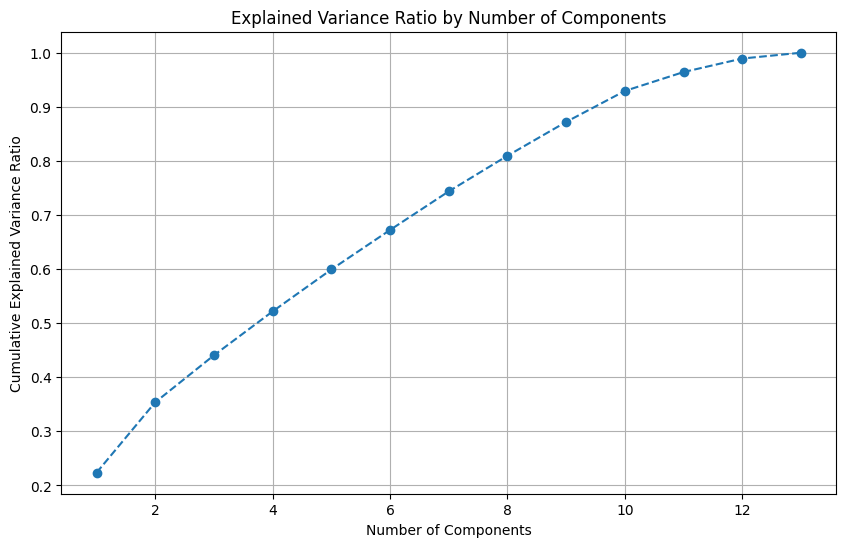

Explained variance by 2 components: 0.35
Shape of data after PCA: (11813, 2)


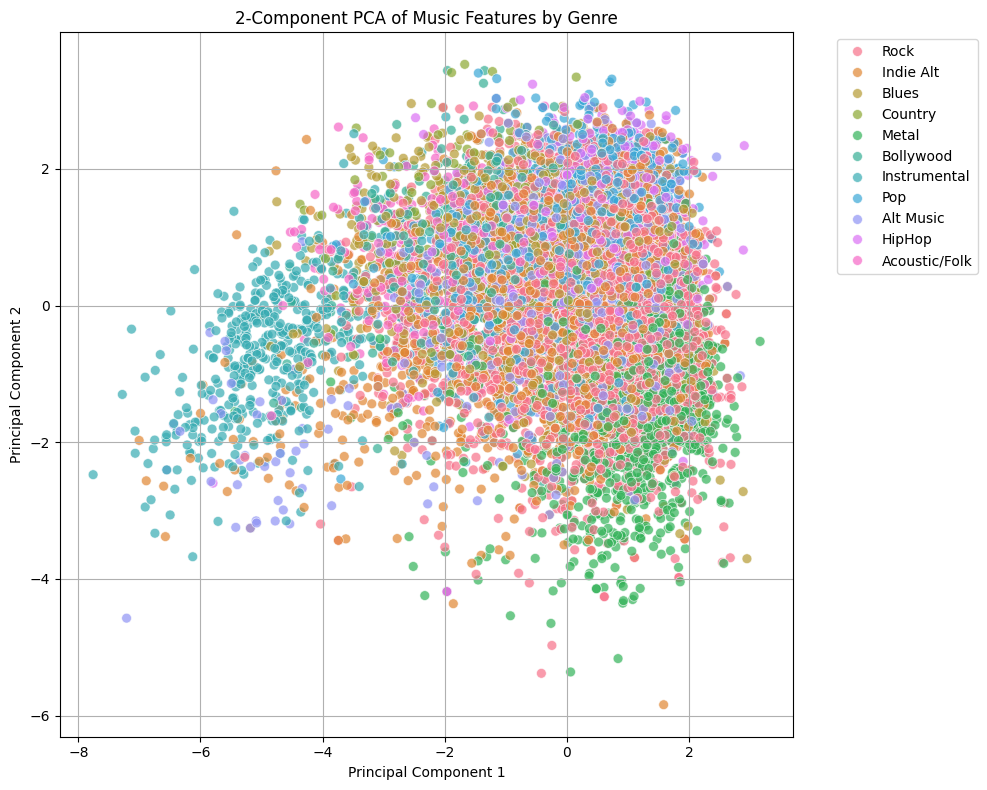

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Prepare Data (using numerical columns and Genre_Name from df_train_merged) ---

# Define the numerical features to be used for PCA
features_for_pca = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_in min/ms', 'time_signature'
]

# Combine the features with 'Popularity' and 'Genre_Name' for initial selection and NaN handling
# We will drop 'Popularity' later if it's not a feature for PCA, but keep it for consistent NaN handling
# 'Class' is an identifier for genre, 'Popularity' might be a target or a feature.
# Let's keep 'Popularity' as a potential target or for later analysis, and 'Genre_Name' for hue.

# Create a working DataFrame with relevant columns and drop NaNs consistently
df_working = df_train_merged[features_for_pca + ['Popularity', 'Genre_Name']].copy()
df_working.dropna(inplace=True)

# Separate features (X) and target/hue (y) from the cleaned DataFrame
X = df_working[features_for_pca]
y_genre = df_working['Genre_Name'] # Renamed to y_genre to avoid confusion with X, y in other contexts
y_popularity = df_working['Popularity'] # Also extracting Popularity if needed later

print(f"Original number of features: {X.shape[1]}")

# --- 2. Data Standardization ---
# It's essential to scale the data before applying PCA.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. Apply PCA ---
# You can choose the number of components or the explained variance ratio.
# Let's start by looking at explained variance to decide.
pca = PCA()
pca.fit(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# From the plot, we can decide how many components to keep.
# For this example, let's pick 2 components for easy visualization.
pca_2_components = PCA(n_components=2)
X_pca = pca_2_components.fit_transform(X_scaled)

print(f"Explained variance by 2 components: {pca_2_components.explained_variance_ratio_.sum():.2f}")
print(f"Shape of data after PCA: {X_pca.shape}")

# --- 4. Visualize the results (optional but illustrative) ---
# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add the 'Genre_Name' back for colored visualization
pca_df['Genre_Name'] = y_genre.reset_index(drop=True)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Genre_Name', data=pca_df, s=50, alpha=0.7)
plt.title('2-Component PCA of Music Features by Genre')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

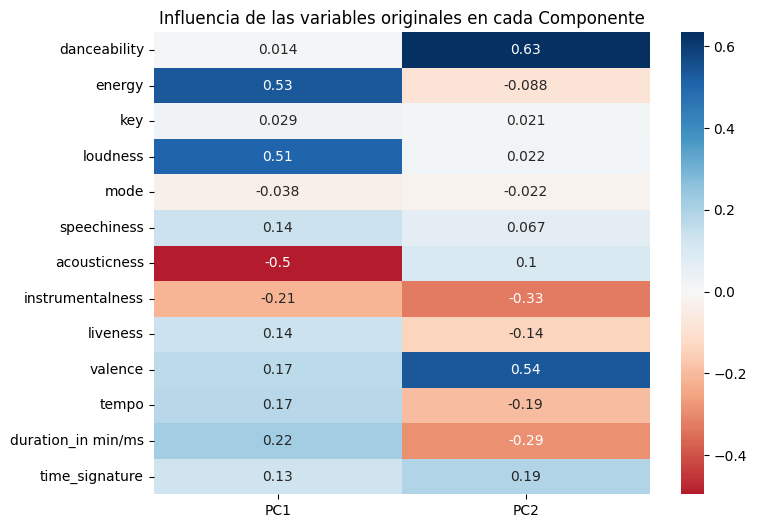

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Extraer las cargas (loadings)
# pca_2_components es el modelo que ajustaste con n_components=2
loadings = pd.DataFrame(
    pca_2_components.components_.T,
    columns=['PC1', 'PC2'],
    index=features_for_pca
)

# 2. Visualizar con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='RdBu', center=0)
plt.title('Influencia de las variables originales en cada Componente')
plt.show()

In [ ]:
print(f"Varianza explicada por PC1 y PC2: {pca_2_components.explained_variance_ratio_.sum() * 100:.2f}%")

Varianza explicada por PC1 y PC2: 35.37%


El porcentaje de varianza de los componentes PC1 y PC2 es baja, por eso considero que para poder ver la grafica de dispersion mejor introducir una variable, pasando de bidimensional a tridemensional.

In [ ]:
import plotly.express as px

# 1. Aplicar PCA con 3 componentes
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

# 2. Crear un DataFrame para el gráfico 3D
pca_df_3d = pd.DataFrame(
    data=X_pca_3,
    columns=['PC1', 'PC2', 'PC3']
)
pca_df_3d['Genre'] = y_genre.values

# 3. Crear el gráfico interactivo
fig = px.scatter_3d(
    pca_df_3d, x='PC1', y='PC2', z='PC3',
    color='Genre',
    title=f'PCA 3D - Varianza Total: {pca_3.explained_variance_ratio_.sum()*100:.2f}%',
    labels={'PC1': 'Componente 1', 'PC2': 'Componente 2', 'PC3': 'Componente 3'},
    opacity=0.7
)

fig.show()

### Cálculo de la WSS y Aplicación del Método del Codo (Elbow Method)

El algoritmo KMeans de sklearn.cluster y su atributo inertia_, que representa la WSS (Suma de los Cuadrados Intra-Cluster). Iteraremos a través de un rango de posibles números de clusters ($k$), calcularemos la WSS para cada uno y luego graficaremos estos valores para identificar el punto de 'codo'.

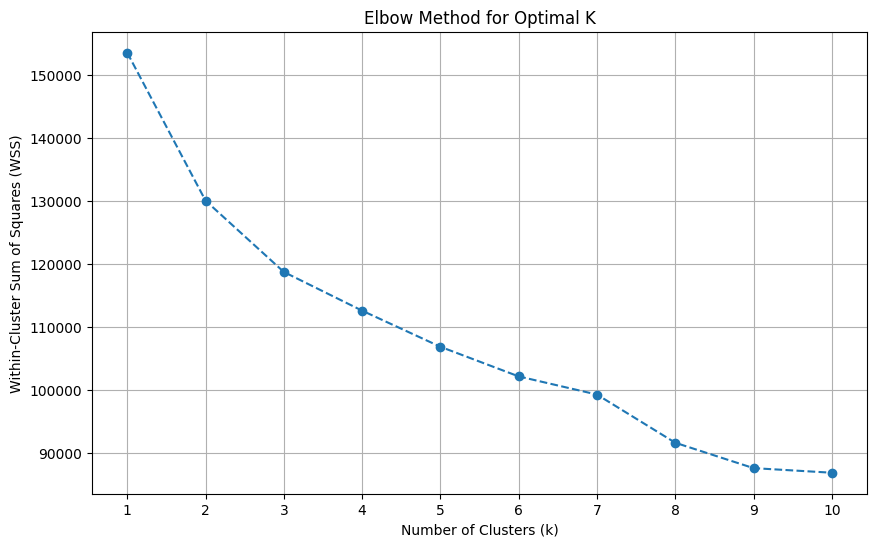

WSS values for k from 1 to 10:
k=1: 153569.00
k=2: 130076.83
k=3: 118749.32
k=4: 112603.95
k=5: 106867.04
k=6: 102162.08
k=7: 99277.66
k=8: 91626.39
k=9: 87592.85
k=10: 86863.52


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X_scaled is available from previous PCA steps.
# If not, you might need to re-run the PCA cell.

# Calculate WSS for a range of k values
wss = []
k_values = range(1, 11) # Test k from 1 to 10

for k in k_values:
    # Initialize KMeans with the current k
    # n_init='auto' is recommended for scikit-learn versions >= 1.2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Fit the model to the scaled data
    kmeans.fit(X_scaled)

    # Append the WSS (inertia) to the list
    wss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

print("WSS values for k from 1 to 10:")
for k, value in zip(k_values, wss):
    print(f"k={k}: {value:.2f}")

### Comparación de Clusters K-Means vs. Géneros Originales en el Espacio PCA 3D

Vamos a visualizar la distribución de los puntos de datos en el espacio PCA 3D, primero coloreados por su `Genre_Name` original y luego por los `cluster_labels` asignados por K-Means. Esto nos permitirá comparar cómo el algoritmo de clustering agrupa las canciones en relación con sus géneros predefinidos.

In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd

# Ensure X_scaled, X_pca_3, and y_genre are available from previous steps
# (X_scaled is the standardized features, X_pca_3 is the 3D PCA transformed data,
# y_genre contains the original genre names)

# --- 1. Aplicar K-Means para obtener las etiquetas de los clusters ---
# Usamos el número de clusters óptimo identificado (por ejemplo, k=8)
n_clusters_optimal = 8
kmeans_optimal = KMeans(n_clusters=n_clusters_optimal, random_state=42, n_init='auto')
cluster_labels = kmeans_optimal.fit_predict(X_scaled)

# --- 2. Preparar el DataFrame para la visualización ---
pca_df_comparison = pd.DataFrame(
    data=X_pca_3,
    columns=['PC1', 'PC2', 'PC3']
)
pca_df_comparison['Original Genre'] = y_genre.values # Géneros originales
pca_df_comparison['KMeans Cluster'] = cluster_labels.astype(str) # Etiquetas de cluster K-Means

# --- 3. Crear los gráficos 3D interactivos ---

# Gráfico 1: Coloreado por Género Original
fig_genre = px.scatter_3d(
    pca_df_comparison, x='PC1', y='PC2', z='PC3',
    color='Original Genre',
    title='PCA 3D: Puntos de Datos Coloreados por Género Original',
    labels={'PC1': 'Componente Principal 1', 'PC2': 'Componente Principal 2', 'PC3': 'Componente Principal 3'},
    opacity=0.7,
    height=600
)
fig_genre.show()

# Gráfico 2: Coloreado por Clusters K-Means
fig_clusters = px.scatter_3d(
    pca_df_comparison, x='PC1', y='PC2', z='PC3',
    color='KMeans Cluster',
    title=f'PCA 3D: Puntos de Datos Coloreados por {n_clusters_optimal} Clusters K-Means',
    labels={'PC1': 'Componente Principal 1', 'PC2': 'Componente Principal 2', 'PC3': 'Componente Principal 3'},
    opacity=0.7,
    height=600
)
fig_clusters.show()

print("Ambos gráficos 3D han sido generados para la comparación visual.")

Ambos gráficos 3D han sido generados para la comparación visual.


Parece que no hay una separación entre grupos bien definida con 8 clusters. Voy a reprentarlo de nuevo, con sólo 4 clusters.

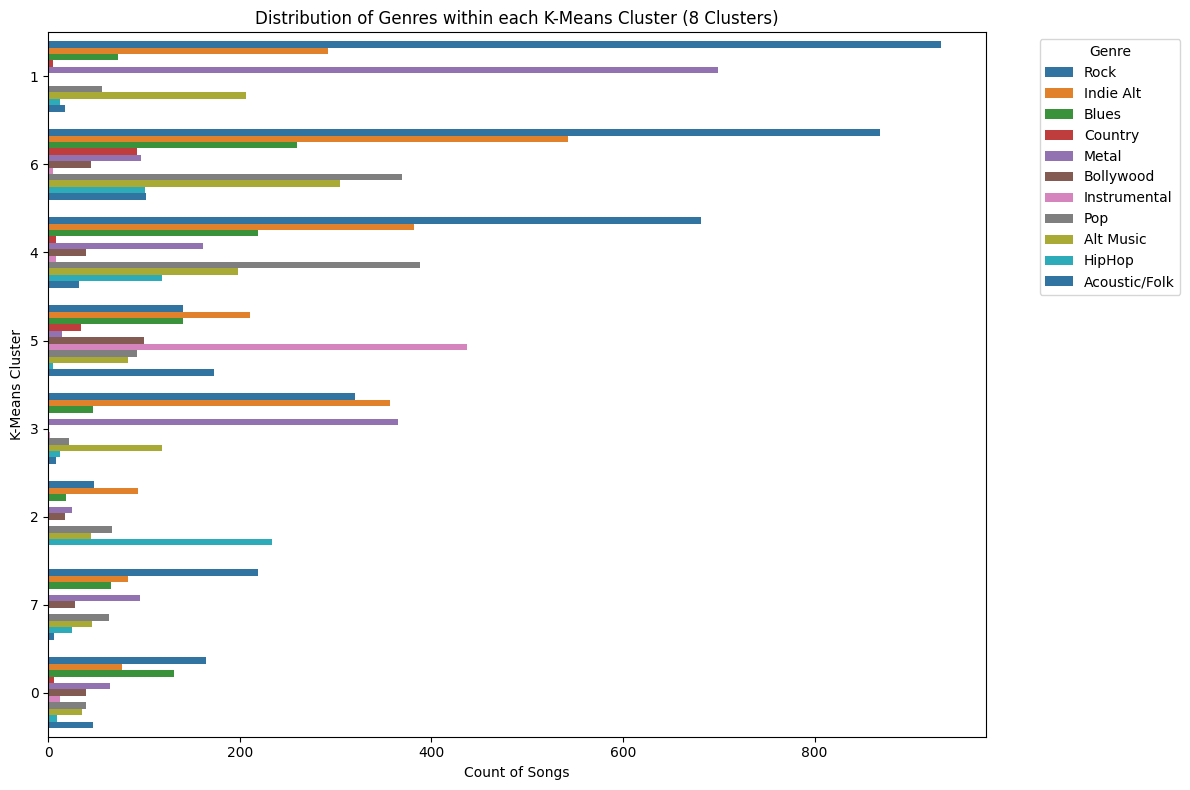

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Re-create df_working from df_train_merged and drop NaNs again to ensure alignment
# This step is crucial to ensure `df_working_for_plotting` has the same rows as `cluster_labels`
# and contains the necessary 'Genre_Name' column.
df_working_for_plotting_8_clusters = df_train_merged[features_for_pca + ['Popularity', 'Genre_Name']].copy()
df_working_for_plotting_8_clusters.dropna(inplace=True)

# Add the 8-cluster labels to the working DataFrame
df_working_for_plotting_8_clusters['KMeans Cluster'] = cluster_labels.astype(str) # Convert to string for plotting hue

plt.figure(figsize=(12, 8))
sns.countplot(data=df_working_for_plotting_8_clusters, y='KMeans Cluster', hue='Genre_Name', palette='tab10')
plt.title('Distribution of Genres within each K-Means Cluster (8 Clusters)')
plt.xlabel('Count of Songs')
plt.ylabel('K-Means Cluster')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px
import pandas as pd

# Ensure X_scaled and X_pca_3 are available from previous steps
# (X_scaled is the standardized features, X_pca_3 is the 3D PCA transformed data)

# --- 1. Aplicar K-Means con 4 clusters ---
n_clusters_new = 4
kmeans_new = KMeans(n_clusters=n_clusters_new, random_state=42, n_init='auto')
cluster_labels_new = kmeans_new.fit_predict(X_scaled)

# --- 2. Preparar el DataFrame para la visualización 3D ---
pca_df_new_clusters = pd.DataFrame(
    data=X_pca_3,
    columns=['PC1', 'PC2', 'PC3']
)
pca_df_new_clusters['KMeans Cluster'] = cluster_labels_new.astype(str) # Convert to string for discrete coloring

# --- 3. Crear el gráfico 3D interactivo coloreado por los nuevos clusters ---
fig_new_clusters = px.scatter_3d(
    pca_df_new_clusters, x='PC1', y='PC2', z='PC3',
    color='KMeans Cluster',
    title=f'PCA 3D: Puntos de Datos Coloreados por {n_clusters_new} Clusters K-Means',
    labels={'PC1': 'Componente Principal 1', 'PC2': 'Componente Principal 2', 'PC3': 'Componente Principal 3'},
    opacity=0.7,
    height=600
)
fig_new_clusters.show()

print(f"Gráfico 3D generado con {n_clusters_new} clusters.")

Gráfico 3D generado con 4 clusters.


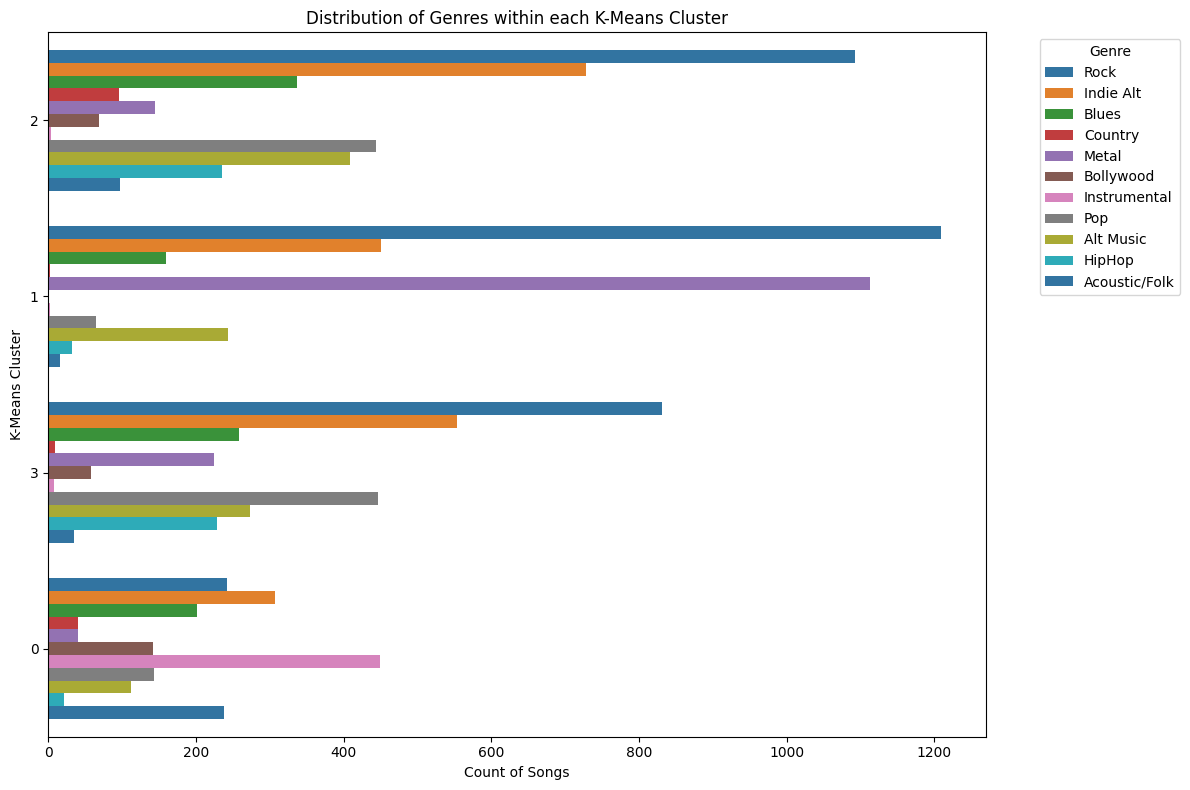

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Re-create df_working from df_train_merged and drop NaNs again to ensure alignment
# This step is crucial to ensure `df_working_for_plotting` has the same rows as `cluster_labels_new`
# and contains the necessary 'Genre_Name' column.
df_working_for_plotting = df_train_merged[features_for_pca + ['Popularity', 'Genre_Name']].copy()
df_working_for_plotting.dropna(inplace=True)

# Add the new cluster labels to the working DataFrame
df_working_for_plotting['KMeans Cluster'] = cluster_labels_new.astype(str) # Convert to string for plotting hue

plt.figure(figsize=(12, 8))
sns.countplot(data=df_working_for_plotting, y='KMeans Cluster', hue='Genre_Name', palette='tab10')
plt.title('Distribution of Genres within each K-Means Cluster')
plt.xlabel('Count of Songs')
plt.ylabel('K-Means Cluster')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

En cualquier caso, parece que va a ser complicado llegar a identificar 11 estilos musicales con un porcentaje alto de probabilidad, ya que los géneros aparecen muy entremezclados.

# Modelos de predicción

In [ ]:
# Count how many times each 'Track Name' appears
track_name_counts = df['Track Name'].value_counts()

# Select only the 'Track Name' values that appear more than once
repeated_track_names = track_name_counts[track_name_counts > 1]

print("Number of times each track name appears (only showing repetitions):")
print(repeated_track_names)

Number of times each track name appears (only showing repetitions):
Track Name
Dreams                9
Runaway               8
Fire                  8
Home                  7
Ghost                 7
                     ..
Supercharged          2
Demure                2
These Kids We Knew    2
Dork                  2
Teenage Kicks         2
Name: count, Length: 2169, dtype: int64


Con este codigo se puede observar la cantidad de nombre de canciones se repiten. En total son 2169 nombres de canciones. Esto se debe a que una misma cancion puede tocarse en diferentes generos musicales. Esto puede llegar a traer problemas al momento de realizar predicciones.

Por eso, antes de probar los diferentes modelos, voy a crear 3 datasets distintos:

DataModel1: El original, con “repeticiones” para las canciones que pertenecen a varios géneros.

-DataModel2: Registros únicos, añadiendo una nueva categoría (“varios”) a la variable target.
La categoría “varios” es un compendio de distintos estilos que no tienen por qué estar relacionados, simplemente son canciones que pertenencen a más de un género, pero éstos pueden ser: Opera+Clasica, Rap+Pop, Pop+Rock…

-DataModel3: Registros únicos, sin añadir una nueva categoría. Las canciones que tengan varios géneros quedarán con el primer género que tengan en el dataset original.

### **DataModel1**

In [ ]:
import pandas as pd

# Create Datamodel1 as a copy of df_train_merged, which contains the original data
Datamodel1 = df_train_merged.copy()

# Convert the 'Genre_Name' column to a categorical type (equivalent to R's factor)
Datamodel1['Genre_Name'] = Datamodel1['Genre_Name'].astype('category')

print("Datamodel1 created with 'Genre_Name' as a categorical variable. Head of Datamodel1:")
display(Datamodel1.head())

Datamodel1 created with 'Genre_Name' as a categorical variable. Head of Datamodel1:


Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class Genre_Name  
0               4      5     HipHop  
1               4     10       Rock  
2               4      6  Indie Alt  
3               4      5     HipHop  
4               4     10       Rock

### **DataModel2**

In [ ]:
import pandas as pd
import numpy as np

# Create a temporary copy of the merged DataFrame to work with
df_temp = df_train_merged.copy()

# Impute missing numerical values before grouping to retain as much data as possible
# Use median for continuous numerical features, mode for discrete/categorical-like numerical features.

cols_to_impute_median = ['Popularity', 'instrumentalness']
cols_to_impute_mode = ['key', 'Class']

for col in cols_to_impute_median:
    if col in df_temp.columns:
        df_temp[col] = df_temp[col].fillna(df_temp[col].median())

for col in cols_to_impute_mode:
    if col in df_temp.columns:
        # Fill with mode, handle cases where mode might be empty (e.g., all NaNs in a specific group)
        mode_val = df_temp[col].mode()
        if not mode_val.empty:
            df_temp[col] = df_temp[col].fillna(mode_val[0])
        else:
            df_temp[col] = df_temp[col].fillna(-1) # Fallback if mode is empty, consider a reasonable placeholder


# Define aggregation functions for each column
agg_funcs = {
    'Popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'key': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Mode for key
    'loudness': 'mean',
    'mode': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Mode for mode
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_in min/ms': 'mean',
    'time_signature': lambda x: x.mode()[0] if not x.mode().empty else np.nan, # Mode for time_signature
    'Class': lambda x: x.mode()[0] if not x.mode().empty else np.nan # Keep original Class code if needed
}

# Group by Artist Name and Track Name
grouped_songs_dm2 = df_temp.groupby(['Artist Name', 'Track Name'])

# Initialize a list to store aggregated rows for DataModel2
data_model2_list = []

for (artist, track), group in grouped_songs_dm2:
    # Determine the Genre_Name for the unique song
    unique_genres = group['Genre_Name'].unique()
    if len(unique_genres) > 1:
        genre_for_song = 'varios'
    else:
        genre_for_song = unique_genres[0] # Only one unique genre

    # Aggregate other features for the unique song
    row_data = {
        'Artist Name': artist,
        'Track Name': track,
        'Genre_Name': genre_for_song
    }
    for col, func in agg_funcs.items():
        if col in group.columns: # Ensure column exists in the group
            if callable(func): # If it's a lambda function (for mode)
                row_data[col] = func(group[col])
            else: # If it's a string like 'mean'
                row_data[col] = group[col].agg(func)

    data_model2_list.append(row_data)

# Create DataModel2 from the list of aggregated rows
DataModel2 = pd.DataFrame(data_model2_list)

# Convert 'Genre_Name' to categorical type
DataModel2['Genre_Name'] = DataModel2['Genre_Name'].astype('category')

print("DataModel2 created with unique songs and 'varios' for multi-genre tracks. Head of DataModel2:")
display(DataModel2.head())
print(f"\nOriginal number of rows in df_train_merged: {len(df_train_merged)}")
print(f"Number of rows in DataModel2 (unique songs): {len(DataModel2)}")
print(f"Unique genres in DataModel2: {DataModel2['Genre_Name'].unique()}")

DataModel2 created with unique songs and 'varios' for multi-genre tracks. Head of DataModel2:


Artist Name                                         Track Name Genre_Name  \
0         $NOT         Whipski (feat. Lil Skies & Internet Money)     HipHop   
1  $uicideboy$  ...And To Those I Love, Thanks For Sticking Ar...     HipHop   
2          '68                                           Bad Bite     varios   
3   (Hed) P.E.                                           Renegade      Metal   
4   (Hed) P.E.                                         Suck It Up      Metal   

   Popularity  danceability  energy  key  loudness  mode  speechiness  \
0        76.0         0.841   0.545  9.0    -8.013     1       0.2220   
1        79.0         0.792   0.511  2.0    -6.876     1       0.0409   
2        36.0         0.558   0.977  1.0    -5.082     1       0.2110   
3        44.0         0.438   0.947  2.0    -3.481     1       0.1480   
4        40.0         0.619   0.871  1.0    -5.214     0       0.0837   

   acousticness  instrumentalness  liveness  valence    tempo  \
0      0.268000          0.003910    0.2500    0.305   94.528   
1      0.124000          0.000090    0.1400    0.111  113.983   
2      0.000618          0.001300    0.3160    0.473  167.984   
3      0.000927          0.003910    0.3550    0.368  174.007   
4      0.000337          0.000833    0.0585    0.412   91.507   

   duration_in min/ms  time_signature  Class  
0            183983.0               4      5  
1            168490.0               4      5  
2            190031.0               4      1  
3            209040.0               4      8  
4            235543.0               4      8


Original number of rows in df_train_merged: 17996
Number of rows in DataModel2 (unique songs): 16109
Unique genres in DataModel2: ['HipHop', 'varios', 'Metal', 'Pop', 'Indie Alt', ..., 'Instrumental', 'Alt Music', 'Acoustic/Folk', 'Bollywood', 'Country']
Length: 12
Categories (12, object): ['Acoustic/Folk', 'Alt Music', 'Blues', 'Bollywood', ..., 'Metal', 'Pop', 'Rock',
                          'varios']


### **DataModel3**

In [ ]:
import pandas as pd
import numpy as np

# Create a temporary copy of the merged DataFrame to work with
df_temp_dm3 = df_train_merged.copy()

# Impute missing numerical values before grouping (same logic as DataModel2 for consistency)
# Use median for continuous numerical features, mode for discrete/categorical-like numerical features.

cols_to_impute_median = ['Popularity', 'instrumentalness']
cols_to_impute_mode = ['key', 'Class']

for col in cols_to_impute_median:
    if col in df_temp_dm3.columns:
        df_temp_dm3[col] = df_temp_dm3[col].fillna(df_temp_dm3[col].median())

for col in cols_to_impute_mode:
    if col in df_temp_dm3.columns:
        mode_val = df_temp_dm3[col].mode()
        if not mode_val.empty:
            df_temp_dm3[col] = df_temp_dm3[col].fillna(mode_val[0])
        else:
            df_temp_dm3[col] = df_temp_dm3[col].fillna(-1) # Fallback if mode is empty

# Define aggregation functions for each column
# This is similar to DataModel2, but for Genre_Name we specifically take the 'first'
agg_funcs_dm3 = {
    'Popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'key': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'loudness': 'mean',
    'mode': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_in min/ms': 'mean',
    'time_signature': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'Class': lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    'Genre_Name': 'first' # Key difference for DataModel3
}

# Group by Artist Name and Track Name and aggregate
# Use .agg() directly for a cleaner approach
DataModel3 = df_temp_dm3.groupby(['Artist Name', 'Track Name']).agg(agg_funcs_dm3).reset_index()

# Convert 'Genre_Name' to categorical type
DataModel3['Genre_Name'] = DataModel3['Genre_Name'].astype('category')

print("DataModel3 created with unique songs, retaining the first genre for multi-genre tracks. Head of DataModel3:")
display(DataModel3.head())
print(f"\nOriginal number of rows in df_train_merged: {len(df_train_merged)}")
print(f"Number of rows in DataModel3 (unique songs): {len(DataModel3)}")
print(f"Unique genres in DataModel3: {DataModel3['Genre_Name'].unique()}")

DataModel3 created with unique songs, retaining the first genre for multi-genre tracks. Head of DataModel3:


Artist Name                                         Track Name  Popularity  \
0         $NOT         Whipski (feat. Lil Skies & Internet Money)        76.0   
1  $uicideboy$  ...And To Those I Love, Thanks For Sticking Ar...        79.0   
2          '68                                           Bad Bite        36.0   
3   (Hed) P.E.                                           Renegade        44.0   
4   (Hed) P.E.                                         Suck It Up        40.0   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.841   0.545  9.0    -8.013     1       0.2220      0.268000   
1         0.792   0.511  2.0    -6.876     1       0.0409      0.124000   
2         0.558   0.977  1.0    -5.082     1       0.2110      0.000618   
3         0.438   0.947  2.0    -3.481     1       0.1480      0.000927   
4         0.619   0.871  1.0    -5.214     0       0.0837      0.000337   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0          0.003910    0.2500    0.305   94.528            183983.0   
1          0.000090    0.1400    0.111  113.983            168490.0   
2          0.001300    0.3160    0.473  167.984            190031.0   
3          0.003910    0.3550    0.368  174.007            209040.0   
4          0.000833    0.0585    0.412   91.507            235543.0   

   time_signature  Class Genre_Name  
0               4      5     HipHop  
1               4      5     HipHop  
2               4      1  Alt Music  
3               4      8      Metal  
4               4      8      Metal


Original number of rows in df_train_merged: 17996
Number of rows in DataModel3 (unique songs): 16109
Unique genres in DataModel3: ['HipHop', 'Alt Music', 'Metal', 'Pop', 'Rock', ..., 'Blues', 'Instrumental', 'Acoustic/Folk', 'Bollywood', 'Country']
Length: 11
Categories (11, object): ['Acoustic/Folk', 'Alt Music', 'Blues', 'Bollywood', ..., 'Instrumental', 'Metal',
                          'Pop', 'Rock']


In [ ]:
import pandas as pd

# 1. Calcular frecuencias relativas y redondear a 2 decimales
# Multiplicamos por 100 para obtener el porcentaje
genre_1 = (Datamodel1['Genre_Name'].value_counts(normalize=True) * 100).round(2)
genre_2 = (DataModel2['Genre_Name'].value_counts(normalize=True) * 100).round(2)
genre_3 = (DataModel3['Genre_Name'].value_counts(normalize=True) * 100).round(2)

# 2. Unir los resultados en un solo DataFrame para visualizarlos
comparison_table = pd.concat([genre_1, genre_2, genre_3], axis=1)
comparison_table.columns = ['Datamodel1 (%)', 'Datamodel2 (%)', 'Datamodel3 (%)']

# 3. Mostrar la tabla
print("Distribución de la variable objetivo 'Genre_Name' en cada conjunto de datos:")
display(comparison_table)

Distribución de la variable objetivo 'Genre_Name' en cada conjunto de datos:


Datamodel1 (%)  Datamodel2 (%)  Datamodel3 (%)
Genre_Name                                                   
Rock                    27.50           24.42           27.21
Indie Alt               14.38           10.86           13.28
Pop                     14.03           13.30           14.39
Metal                   10.30           10.13           10.78
HipHop                   8.04            8.57            8.73
Alt Music                7.63            3.59            5.85
Blues                    7.07            7.26            7.57
Acoustic/Folk            3.47            3.69            3.77
Instrumental             3.20            3.54            3.56
Bollywood                2.23            2.50            2.50
Country                  2.15            2.35            2.37
varios                    NaN            9.78             NaN

Datamodel1 (Original con repeticiones): Este modelo muestra la distribución original de géneros. Rock, Indie Alt y Pop son los géneros más predominantes.

Datamodel2 (Registros únicos con 'varios'): La principal diferencia aquí es la introducción de la categoría 'varios', que representa el 9.78% de las canciones. Esta categoría agrupa a todas las canciones que originalmente pertenecían a más de un género. Como consecuencia, los porcentajes de otros géneros como Rock y Indie Alt se reducen ligeramente en comparación con Datamodel1

Datamodel3 (Registros únicos, primer género): En este modelo, las canciones duplicadas se han consolidado a una sola entrada, conservando el primer género asignado en el dataset original. Aquí no hay categoría 'varios'. Observamos que las distribuciones son más parecidas a Datamodel1. Rock mantiene una alta proporción, y HipHop muestra un ligero aumento respecto a Datamodel1

## Modelo Randomforest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming Datamodel1 is already created from previous cells
# If not, ensure df_train_merged is available and create Datamodel1:
# Datamodel1 = df_train_merged.copy()
# Datamodel1['Genre_Name'] = Datamodel1['Genre_Name'].astype('category')


features_df = Datamodel1.drop(columns=['Artist Name', 'Track Name', 'Class', 'Genre_Name']).copy()
target = Datamodel1['Genre_Name']

# Identify numerical columns for imputation and scaling
numerical_cols = features_df.select_dtypes(include=np.number).columns.tolist()

# Impute missing values for numerical features (using median, consistent with previous steps)
imputer = SimpleImputer(strategy='median')
features_df[numerical_cols] = imputer.fit_transform(features_df[numerical_cols])

# Standardize numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df[numerical_cols])
features_scaled_df = pd.DataFrame(features_scaled, columns=numerical_cols, index=features_df.index)

# Use a random state for reproducibility, similar to R's set.seed
np.random.seed(34)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled_df, target, test_size=0.3, random_state=34, stratify=target
)

# Initialize and train the RandomForestClassifier model
# Parameters are translated from the R ranger function where applicable
fit1 = RandomForestClassifier(
    n_estimators=1000,          # num.trees
    criterion='gini',           # splitrule = "gini"
    min_samples_leaf=1,         # min.node.size
    random_state=34,            # for reproducibility
    n_jobs=-1,                  # Use all available cores for parallel processing
    verbose=0                   # verbose = FALSE, set to 0 for no output during training
)

fit1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = fit1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("Random Forest model (fit1) trained successfully.")



Model Accuracy: 0.5097
Random Forest model (fit1) trained successfully.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming DataModel2 is already created from previous cells
# DataModel2 contains unique songs and 'varios' for multi-genre tracks

# Drop 'Artist Name' and 'Track Name' as they are not suitable for direct use as features
# 'Class' is redundant as 'Genre_Name' is our target
features_df_dm2 = DataModel2.drop(columns=['Artist Name', 'Track Name', 'Class', 'Genre_Name']).copy()
target_dm2 = DataModel2['Genre_Name']

# Identify numerical columns for imputation and scaling
numerical_cols_dm2 = features_df_dm2.select_dtypes(include=np.number).columns.tolist()

# Impute missing values for numerical features (using median, consistent with previous steps)
imputer_dm2 = SimpleImputer(strategy='median')
features_df_dm2[numerical_cols_dm2] = imputer_dm2.fit_transform(features_df_dm2[numerical_cols_dm2])

# Standardize numerical features
scaler_dm2 = StandardScaler()
features_scaled_dm2 = scaler_dm2.fit_transform(features_df_dm2[numerical_cols_dm2])
features_scaled_df_dm2 = pd.DataFrame(features_scaled_dm2, columns=numerical_cols_dm2, index=features_df_dm2.index)

# Use a random state for reproducibility, similar to R's set.seed
np.random.seed(34)

# Split data into training and testing sets
X_train_dm2, X_test_dm2, y_train_dm2, y_test_dm2 = train_test_split(
    features_scaled_df_dm2, target_dm2, test_size=0.3, random_state=34, stratify=target_dm2
)

# Initialize and train the RandomForestClassifier model (equivalent to R's ranger)
# Parameters are translated from the R ranger function where applicable
fit2 = RandomForestClassifier(
    n_estimators=1000,          # num.trees
    criterion='gini',           # splitrule = "gini"
    min_samples_leaf=1,         # min.node.size
    random_state=34,            # for reproducibility
    n_jobs=-1,                  # Use all available cores for parallel processing
    verbose=0                   # verbose = FALSE, set to 0 for no output during training
)

fit2.fit(X_train_dm2, y_train_dm2)

# Make predictions on the test set
y_pred_dm2 = fit2.predict(X_test_dm2)

# Evaluate the model
accuracy_dm2 = accuracy_score(y_test_dm2, y_pred_dm2)
print(f"Model Accuracy for DataModel2: {accuracy_dm2:.4f}")

print("Random Forest model (fit2) trained successfully using DataModel2.")


Model Accuracy for DataModel2: 0.5485
Random Forest model (fit2) trained successfully using DataModel2.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming DataModel3 is already created from previous cells
# DataModel3 contains unique songs, retaining the first genre for multi-genre tracks

# Drop 'Artist Name' and 'Track Name' as they are not suitable for direct use as features
# 'Class' is redundant as 'Genre_Name' is our target
features_df_dm3 = DataModel3.drop(columns=['Artist Name', 'Track Name', 'Class', 'Genre_Name']).copy()
target_dm3 = DataModel3['Genre_Name']

# Identify numerical columns for imputation and scaling
numerical_cols_dm3 = features_df_dm3.select_dtypes(include=np.number).columns.tolist()

# Impute missing values for numerical features (using median, consistent with previous steps)
imputer_dm3 = SimpleImputer(strategy='median')
features_df_dm3[numerical_cols_dm3] = imputer_dm3.fit_transform(features_df_dm3[numerical_cols_dm3])

# Standardize numerical features
scaler_dm3 = StandardScaler()
features_scaled_dm3 = scaler_dm3.fit_transform(features_df_dm3[numerical_cols_dm3])
features_scaled_df_dm3 = pd.DataFrame(features_scaled_dm3, columns=numerical_cols_dm3, index=features_df_dm3.index)

# Use a random state for reproducibility, similar to R's set.seed
np.random.seed(34)

# Split data into training and testing sets
X_train_dm3, X_test_dm3, y_train_dm3, y_test_dm3 = train_test_split(
    features_scaled_df_dm3, target_dm3, test_size=0.3, random_state=34, stratify=target_dm3
)

# Initialize and train the RandomForestClassifier model (equivalent to R's ranger)
# Parameters are translated from the R ranger function where applicable
fit3 = RandomForestClassifier(
    n_estimators=1000,          # num.trees
    criterion='gini',           # splitrule = "gini"
    min_samples_leaf=1,         # min.node.size
    random_state=34,            # for reproducibility
    n_jobs=-1,                  # Use all available cores for parallel processing
    verbose=0                   # verbose = FALSE, set to 0 for no output during training
)

fit3.fit(X_train_dm3, y_train_dm3)

# Make predictions on the test set
y_pred_dm3 = fit3.predict(X_test_dm3)

# Evaluate the model
accuracy_dm3 = accuracy_score(y_test_dm3, y_pred_dm3)
print(f"Model Accuracy for DataModel3: {accuracy_dm3:.4f}")

print("Random Forest model (fit3) trained successfully using DataModel3.")


Model Accuracy for DataModel3: 0.5696
Random Forest model (fit3) trained successfully using DataModel3.


## Prueba sobre el conjunto de test:



In [ ]:
RF_result1 = fit1.predict(X_test)
RF_result2 = fit2.predict(X_test_dm2)
RF_result3 = fit3.predict(X_test_dm3)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Datamodel1
RF1_accuracy = accuracy_score(y_test, RF_result1)

# Calculate accuracy for Datamodel2
RF2_accuracy = accuracy_score(y_test_dm2, RF_result2)

# Calculate accuracy for Datamodel3
RF3_accuracy = accuracy_score(y_test_dm3, RF_result3)

print(f"Accuracy for DataModel1: {RF1_accuracy:.4f}")
print(f"Accuracy for DataModel2: {RF2_accuracy:.4f}")
print(f"Accuracy for DataModel3: {RF3_accuracy:.4f}")

Accuracy for DataModel1: 0.5097
Accuracy for DataModel2: 0.5485
Accuracy for DataModel3: 0.5696


Utilizando el Datamodel3 tenemos una tasa de aciertos mucho más alta. Este dataset sólo recoge una observación en los casos en los que la canción pertenezca a varios géneros. Por lo tanto, “sacrificamos” datos de entrenamiento, pero las canciones tienen géneros unívocos.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create a copy to avoid modifying the original DataModel3 directly
df_model3_clean2 = DataModel3.copy()

# Define features and target
# Columns to drop based on R code's intent and existing Python dataframes
columns_to_drop = ['Artist Name', 'Track Name', 'Class', 'duration_in min/ms']

# Filter out columns that do not exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df_model3_clean2.columns]

features_dm3_2 = df_model3_clean2.drop(columns=existing_columns_to_drop + ['Genre_Name']).copy()
target_dm3_2 = df_model3_clean2['Genre_Name']

# Identify numerical columns for imputation and scaling
numerical_cols_dm3_2 = features_dm3_2.select_dtypes(include=np.number).columns.tolist()

# Impute missing values for numerical features (using median)
imputer_dm3_2 = SimpleImputer(strategy='median')
features_dm3_2[numerical_cols_dm3_2] = imputer_dm3_2.fit_transform(features_dm3_2[numerical_cols_dm3_2])

# Standardize numerical features
scaler_dm3_2 = StandardScaler()
features_scaled_dm3_2 = scaler_dm3_2.fit_transform(features_dm3_2[numerical_cols_dm3_2])
features_scaled_df_dm3_2 = pd.DataFrame(features_scaled_dm3_2, columns=numerical_cols_dm3_2, index=features_dm3_2.index)

# Set random state for reproducibility (equivalent to R's set.seed)
np.random.seed(34)

# Split data into training and testing sets (equivalent to R's createDataPartition)
X_train_dm3_2, X_test_dm3_2, y_train_dm3_2, y_test_dm3_2 = train_test_split(
    features_scaled_df_dm3_2, target_dm3_2, test_size=0.25, random_state=34, stratify=target_dm3_2
) # R's p=0.75 for training means test_size=0.25

# Initialize and train the RandomForestClassifier model (equivalent to R's ranger)
fit3_2 = RandomForestClassifier(
    n_estimators=1000,          # num.trees
    criterion='gini',           # splitrule = "gini"
    min_samples_leaf=1,         # min.node.size
    random_state=34,            # for reproducibility
    n_jobs=-1,                  # Use all available cores for parallel processing
    verbose=0                   # verbose = FALSE, set to 0 for no output during training
)

fit3_2.fit(X_train_dm3_2, y_train_dm3_2)

# Make predictions on the test set
y_pred_dm3_2 = fit3_2.predict(X_test_dm3_2)

# Evaluate the model
accuracy_dm3_2 = accuracy_score(y_test_dm3_2, y_pred_dm3_2)
print(f"Model Accuracy for DataModel3_cleaned: {accuracy_dm3_2:.4f}")

print("Random Forest model (fit3_2) trained successfully using DataModel3_cleaned.")

Model Accuracy for DataModel3_cleaned: 0.5099
Random Forest model (fit3_2) trained successfully using DataModel3_cleaned.


In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set using the Python model
RF_result3_2 = fit3_2.predict(X_test_dm3_2)

# Calculate accuracy
RF3_2_accuracy = accuracy_score(y_test_dm3_2, RF_result3_2)

print(f"Accuracy for DataModel3_cleaned: {RF3_2_accuracy:.4f}")

Accuracy for DataModel3_cleaned: 0.5099


La precisión del modelo Random Forest entrenado con el DataModel3_cleaned (después de la eliminación de la columna duration_in min/ms) es del 50.99%. Como ya comentamos, esta precisión es ligeramente inferior a la obtenida con el DataModel3 original (56.96%), lo que refuerza la idea de que la duración de la canción (duration_in min/ms) era una característica valiosa para la predicción del género musical. Veamos que sucede si ahora DataModel3 eliminando la variable liveness.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Create a copy to avoid modifying the original DataModel3 directly
df_model3_clean2_2 = DataModel3.copy()

# Define features and target
# Columns to drop based on the R code's intent and existing Python dataframes
# Keeping 'Artist Name', 'Track Name', 'Class' in the initial drop list for consistency with previous models,
# even if they might have been dropped implicitly in previous feature extraction.
columns_to_drop_extended = ['Artist Name', 'Track Name', 'Class', 'duration_in min/ms', 'liveness']

# Filter out columns that do not exist in the DataFrame
existing_columns_to_drop_extended = [col for col in columns_to_drop_extended if col in df_model3_clean2_2.columns]

features_dm3_2_2 = df_model3_clean2_2.drop(columns=existing_columns_to_drop_extended + ['Genre_Name']).copy()
target_dm3_2_2 = df_model3_clean2_2['Genre_Name']

# Identify numerical columns for imputation and scaling
numerical_cols_dm3_2_2 = features_dm3_2_2.select_dtypes(include=np.number).columns.tolist()

# Impute missing values for numerical features (using median)
imputer_dm3_2_2 = SimpleImputer(strategy='median')
features_dm3_2_2[numerical_cols_dm3_2_2] = imputer_dm3_2_2.fit_transform(features_dm3_2_2[numerical_cols_dm3_2_2])

# Standardize numerical features
scaler_dm3_2_2 = StandardScaler()
features_scaled_dm3_2_2 = scaler_dm3_2_2.fit_transform(features_dm3_2_2[numerical_cols_dm3_2_2])
features_scaled_df_dm3_2_2 = pd.DataFrame(features_scaled_dm3_2_2, columns=numerical_cols_dm3_2_2, index=features_dm3_2_2.index)

# Set random state for reproducibility (equivalent to R's set.seed)
np.random.seed(34)

# Split data into training and testing sets (equivalent to R's createDataPartition)
X_train_dm3_2_2, X_test_dm3_2_2, y_train_dm3_2_2, y_test_dm3_2_2 = train_test_split(
    features_scaled_df_dm3_2_2, target_dm3_2_2, test_size=0.25, random_state=34, stratify=target_dm3_2_2
) # R's p=0.75 for training means test_size=0.25

# Initialize and train the RandomForestClassifier model (equivalent to R's ranger)
fit3_2_2 = RandomForestClassifier(
    n_estimators=1000,          # num.trees
    criterion='gini',           # splitrule = "gini"
    min_samples_leaf=1,         # min.node.size
    random_state=34,            # for reproducibility
    n_jobs=-1,                  # Use all available cores for parallel processing
    verbose=0                   # verbose = FALSE, set to 0 for no output during training
)

fit3_2_2.fit(X_train_dm3_2_2, y_train_dm3_2_2)

# Make predictions on the test set
y_pred_dm3_2_2 = fit3_2_2.predict(X_test_dm3_2_2)

# Evaluate the model
accuracy_dm3_2_2 = accuracy_score(y_test_dm3_2_2, y_pred_dm3_2_2)
print(f"Model Accuracy for DataModel3_cleaned_liveness_removed: {accuracy_dm3_2_2:.4f}")

print("Random Forest model (fit3_2_2) trained successfully using DataModel3 with 'liveness' removed.")


Model Accuracy for DataModel3_cleaned_liveness_removed: 0.5102
Random Forest model (fit3_2_2) trained successfully using DataModel3 with 'liveness' removed.


La precisión del modelo Random Forest entrenado con el DataModel3 después de eliminar la variable liveness es del 51.02%. Esta precisión es muy similar a la obtenida cuando eliminamos la variable duration_in min/ms (50.99%), y ambas son inferiores a la precisión del modelo original con DataModel3 (56.96%).

Veamos la importancia de las variables:



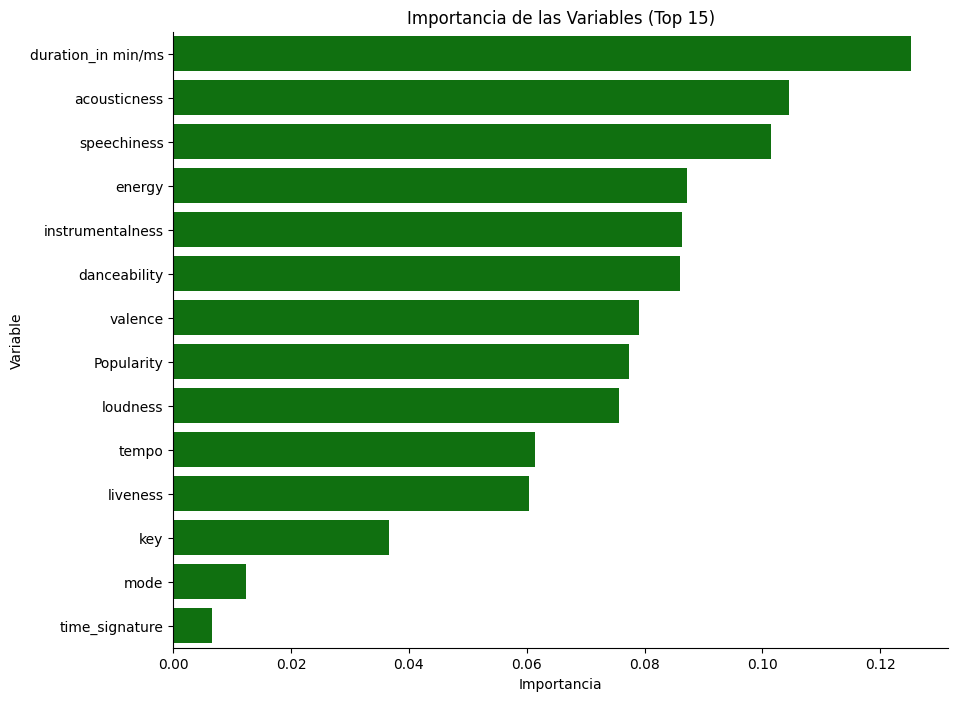

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Re-create features_dm3 to ensure it's available in this scope
# This step is crucial because features_dm3 was defined in a previous cell's scope
# and might not be directly accessible here without re-execution of its definition logic.
features_dm3 = DataModel3.drop(columns=['Artist Name', 'Track Name', 'Class', 'Genre_Name']).copy()

# 1. Convertir la importancia de variables a DataFrame
# Usamos el modelo fit3 (entrenado con DataModel3, que tuvo la mayor precisión)
# Y las columnas de features_dm3
RF3_imp = pd.DataFrame({
    'myvar': features_dm3.columns,
    'RF3_imp': fit3.feature_importances_
})

# 2. Ordenar de mayor a menor y tomar las primeras 15
RF3_imp = RF3_imp.sort_values(by='RF3_imp', ascending=False).head(15)

# 3. Crear el gráfico de barras (Equivalente a ggbarplot)
plt.figure(figsize=(10, 8))
sns.barplot(
    data=RF3_imp,
    x='RF3_imp',
    y='myvar',
    color='green'
)

# Configuración de estilo similar a theme_minimal()
plt.title('Importancia de las Variables (Top 15)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
sns.despine() # Elimina los bordes sobrantes
plt.show()

Y la Matriz de confusión:



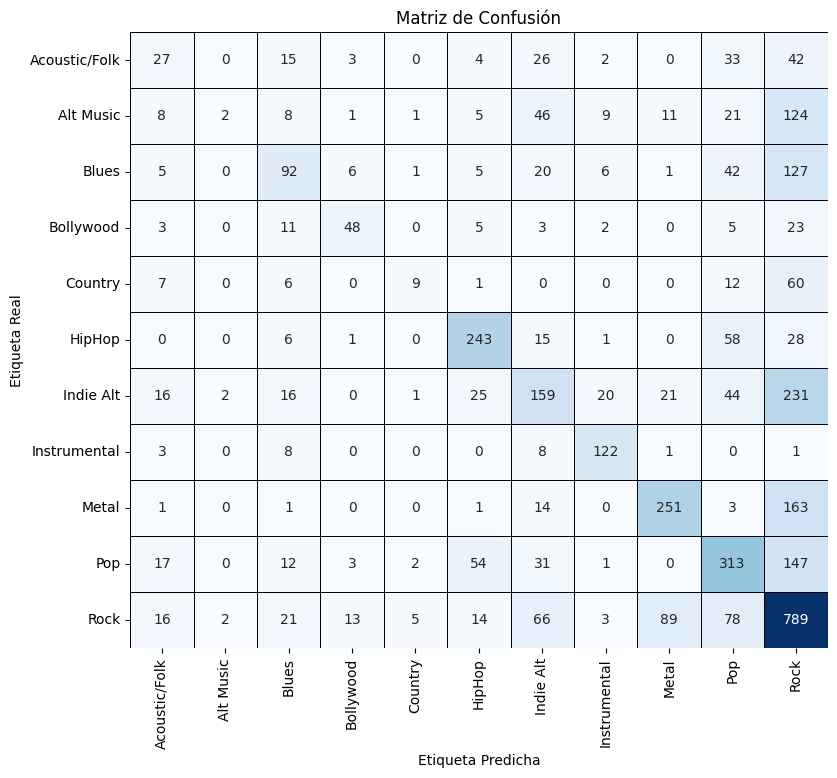

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test_dm3_2_2 and y_pred_dm3_2_2 are available from the last model run (fit3_2_2)
# If you intend to use another test set or prediction, adjust the variables accordingly.

# Calculate the confusion matrix
cm = confusion_matrix(y_test_dm3_2_2, y_pred_dm3_2_2)

# Get unique class labels for better visualization
class_labels = sorted(y_test_dm3_2_2.unique())

# Create a DataFrame for the confusion matrix for better labeling
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(9, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            linewidths=.5, linecolor='black')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

Al observar la matriz, podemos extraer las siguientes conclusiones:

+ Predicciones Correctas: Los valores más altos en la diagonal indican los géneros que el modelo clasifica mejor. Por ejemplo, el género 'HipHop' tiene un alto número de predicciones correctas (243), así como 'Instrumental' (122) y 'Pop' (313).
+ Confusiones Comunes: Los valores fuera de la diagonal principal muestran dónde el modelo se equivoca. Por ejemplo, se puede observar que el género 'Rock' (última columna) recibe un número considerable de predicciones de otros géneros, como 'Alt Music' (124), 'Blues' (127) e 'Indie Alt' (231), lo que sugiere que hay cierta superposición o similitud en las características entre estos géneros que confunde al modelo.
+ Géneros Difíciles de Clasificar: Algunos géneros con un bajo número de predicciones correctas en la diagonal y se confunden fácilmente con otros. Es especialmente notorio en géneros con menos datos o con características menos distintivas. Por ejemplo, 'Country' solo tiene 9 predicciones correctas, confundiéndose con 'Pop' y 'Rock'.

El genero aparentemente mas sencillo de diferenciar es el Rock.

In [ ]:
import pandas as pd

# Assuming y_test_dm3_2 and RF_result3_2 are available from previous steps
# (y_test_dm3_2 are the true values and RF_result3_2 are the predicted values)

compare_rf = pd.DataFrame({
    'true_value': y_test_dm3_2.values,  # Get the values from the Series
    'predicted_value': RF_result3_2,
    'model': 'random_forest'
})

print("DataFrame 'compare_rf' created successfully:")
print(compare_rf.head())

DataFrame 'compare_rf' created successfully:
  true_value predicted_value          model
0       Rock            Rock  random_forest
1  Indie Alt       Indie Alt  random_forest
2      Metal           Metal  random_forest
3       Rock            Rock  random_forest
4      Metal       Indie Alt  random_forest


### Decision Tree

Aplicamos el modelo de árboles de decisión, sobre el datamodel3.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming DataModel3 is already created from previous cells
# DataModel3 contains unique songs, retaining the first genre for multi-genre tracks

# Drop 'Artist Name' and 'Track Name' as they are not suitable for direct use as features
# 'Class' is redundant as 'Genre_Name' is our target
# We'll use the same feature set as for the best performing Random Forest model (fit3)
features_df_dt = DataModel3.drop(columns=['Artist Name', 'Track Name', 'Class', 'Genre_Name']).copy()
target_dt = DataModel3['Genre_Name']

# Identify numerical columns for imputation and scaling
numerical_cols_dt = features_df_dt.select_dtypes(include=np.number).columns.tolist()

# Impute missing values for numerical features (using median)
imputer_dt = SimpleImputer(strategy='median')
features_df_dt[numerical_cols_dt] = imputer_dt.fit_transform(features_df_dt[numerical_cols_dt])

# Standardize numerical features
scaler_dt = StandardScaler()
features_scaled_dt = scaler_dt.fit_transform(features_df_dt[numerical_cols_dt])
features_scaled_df_dt = pd.DataFrame(features_scaled_dt, columns=numerical_cols_dt, index=features_df_dt.index)

# Use a random state for reproducibility
np.random.seed(34)

# Split data into training and testing sets (using the same split as for fit3)
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    features_scaled_df_dt, target_dt, test_size=0.3, random_state=34, stratify=target_dt
)

# Initialize and train the Decision Tree Classifier model
# Set random_state for reproducibility, max_depth to control complexity (similar to rpart.control)
dec_tree = DecisionTreeClassifier(random_state=34, max_depth=10) # max_depth can be tuned
dec_tree.fit(X_train_dt, y_train_dt)

# Make predictions on the test set
y_pred_dt = dec_tree.predict(X_test_dt)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Model Accuracy for Decision Tree on DataModel3: {accuracy_dt:.4f}")

print("Decision Tree model trained successfully.")

Model Accuracy for Decision Tree on DataModel3: 0.4914
Decision Tree model trained successfully.


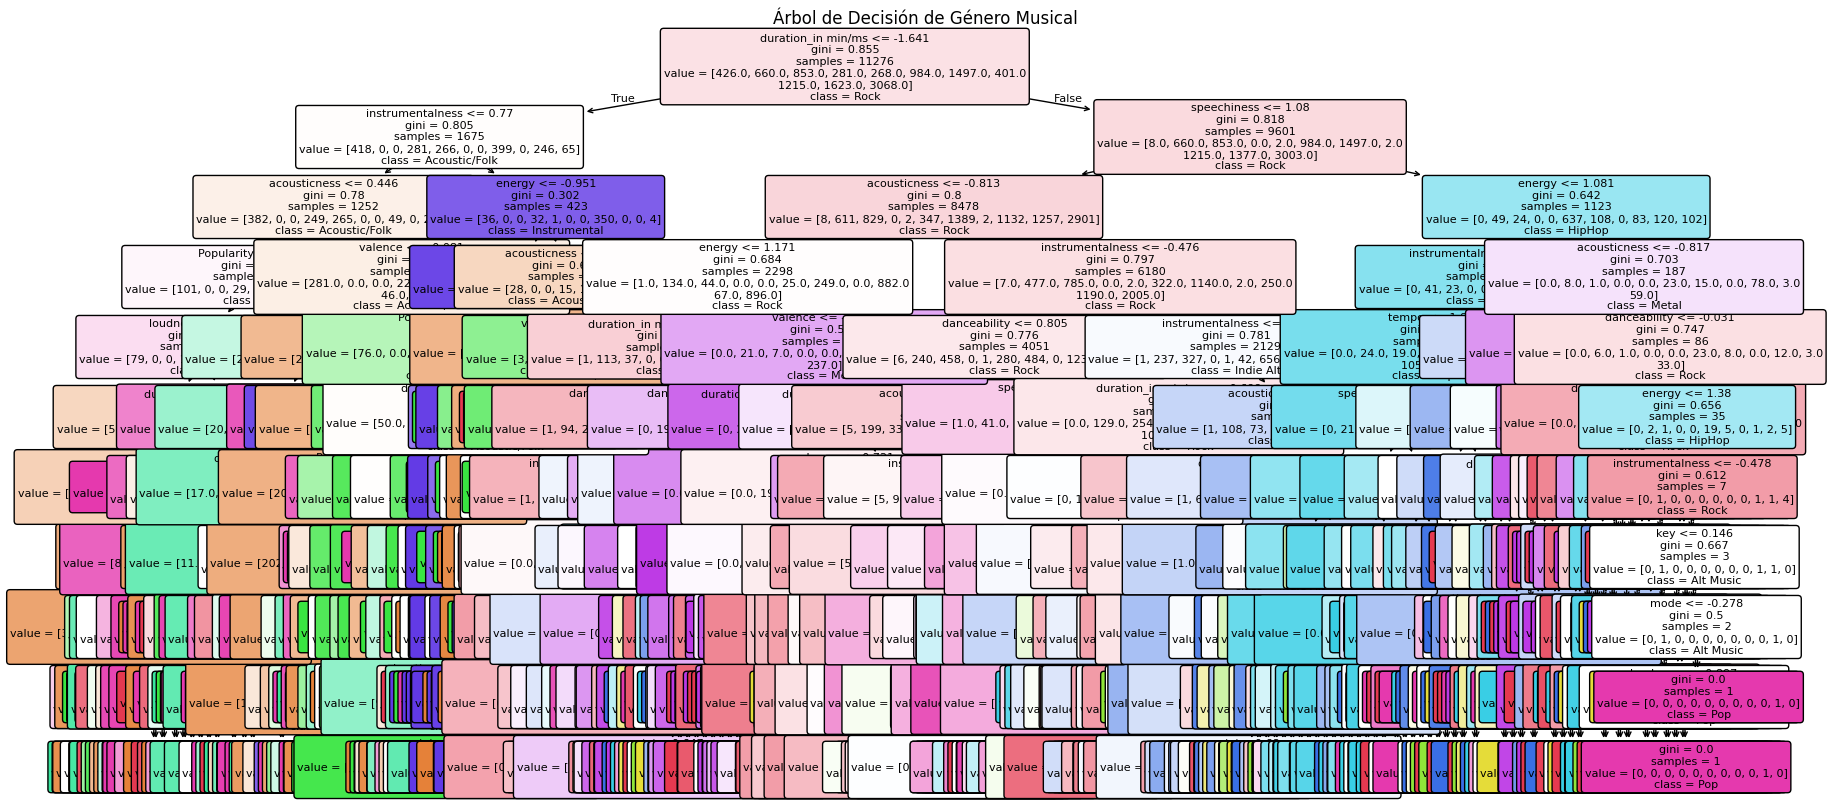

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    dec_tree,
    feature_names=X_train_dt.columns.tolist(),
    class_names=dec_tree.classes_.tolist(),
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title('Árbol de Decisión de Género Musical')
plt.show()

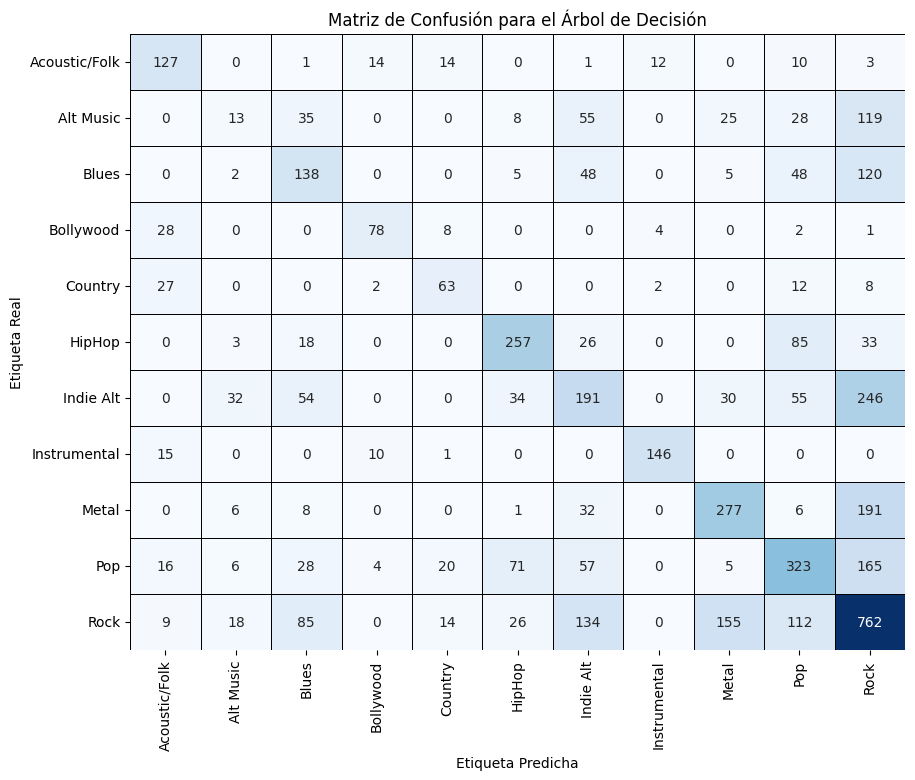

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the Decision Tree model
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)

# Get unique class labels for better visualization
class_labels_dt = sorted(y_test_dt.unique())

# Create a DataFrame for the confusion matrix for better labeling
cm_df_dt = pd.DataFrame(cm_dt, index=class_labels_dt, columns=class_labels_dt)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            linewidths=.5, linecolor='black')
plt.title('Matriz de Confusión para el Árbol de Decisión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

En la matriz se puede observar que los géneros que comparten características musicales, como Rock, Alt Music e Indie Alt, mustran la existencia de muchas confusiones mutuas.

Se prueba con nuevas variables.

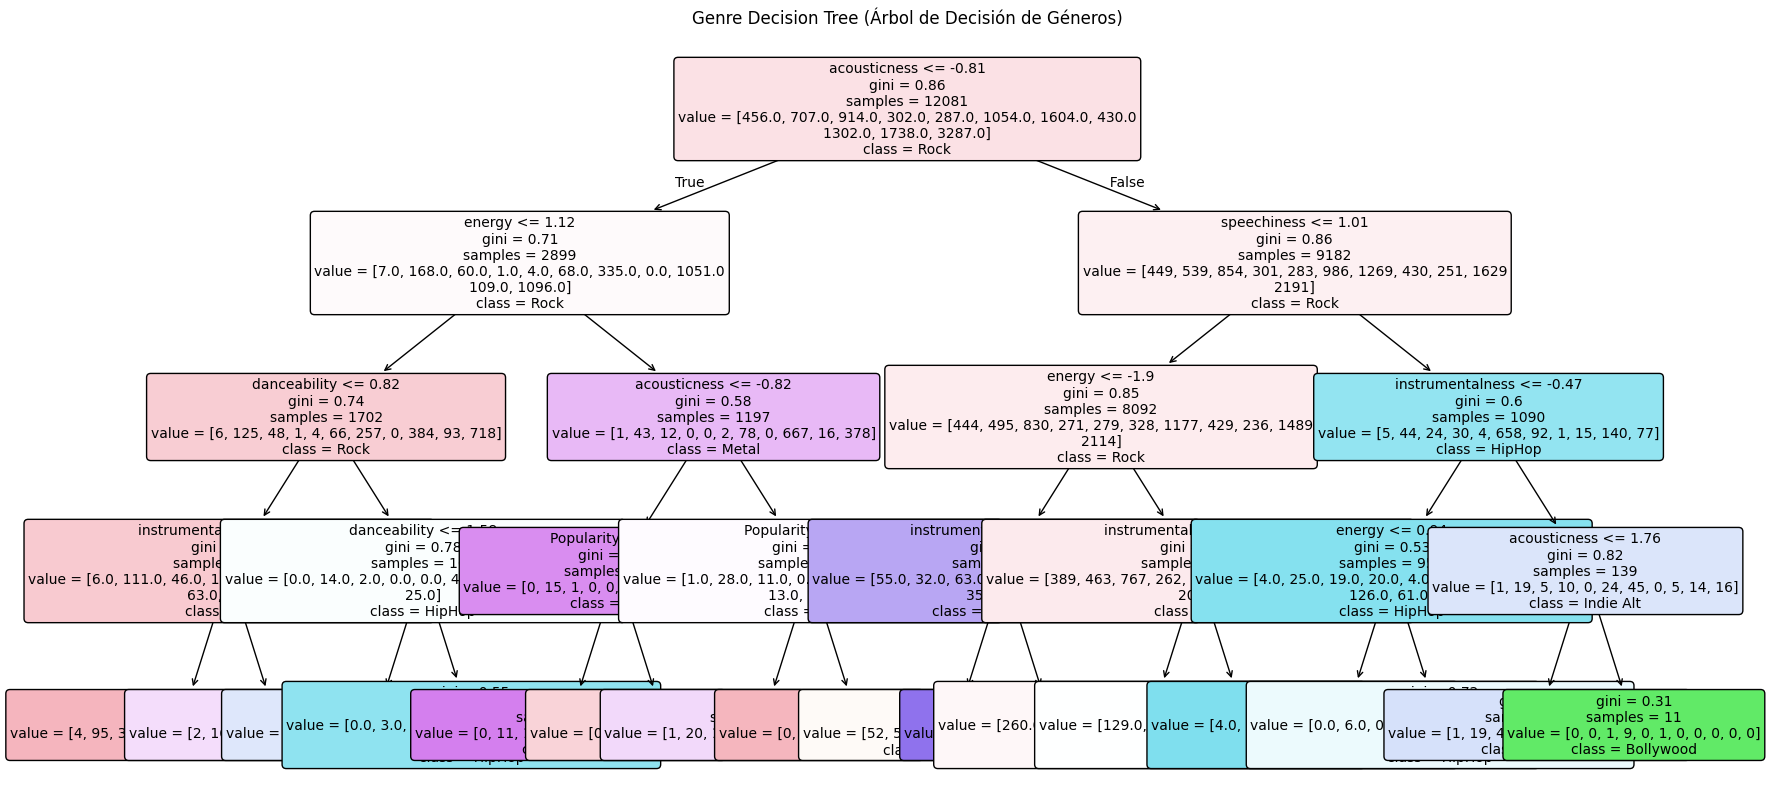

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. Limpieza de datos
# Use the correctly cased DataFrame name: DataModel3
# Adjust column names to match the actual DataFrame columns
cols_to_drop = [
    'Artist Name', 'Track Name', 'duration_in min/ms',
    'mode', 'liveness', 'tempo',
    'loudness', 'valence', 'Class' # Removed 'idioma', 'duration_min', 'duration_ms', 'name_freq' as they don't exist
]

# Filter out columns that do not exist in DataModel3
existing_cols_to_drop = [col for col in cols_to_drop if col in DataModel3.columns]

Datamodel3_clean2I = DataModel3.drop(columns=existing_cols_to_drop).copy()

# 2. Separar características (X) y etiqueta objetivo (y)
# Adjust the target variable name to 'Genre_Name'
X = Datamodel3_clean2I.drop(columns=['Genre_Name'])
y = Datamodel3_clean2I['Genre_Name']

# Impute missing values for numerical features (using median)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

# Standardize numerical features (important for many models, though less critical for basic DTs)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# 3. Partición de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.25, random_state=34, stratify=y
)

# 4. Entrenar el Árbol de Decisión
dec_tree2I = DecisionTreeClassifier(random_state=34, max_depth=4, criterion='gini')
dec_tree2I.fit(X_train, y_train)

# 5. Visualización del Árbol
plt.figure(figsize=(20, 10))
plot_tree(
    dec_tree2I,
    feature_names=X.columns.tolist(), # Use X.columns.tolist() for feature names
    class_names=dec_tree2I.classes_.tolist(), # Use dec_tree2I.classes_.tolist() for class names
    filled=True,
    rounded=True,
    fontsize=10,
    precision=2
)
plt.title('Genre Decision Tree (Árbol de Decisión de Géneros)')
plt.show()

Accuracy for Decision Tree with new features: 0.3704


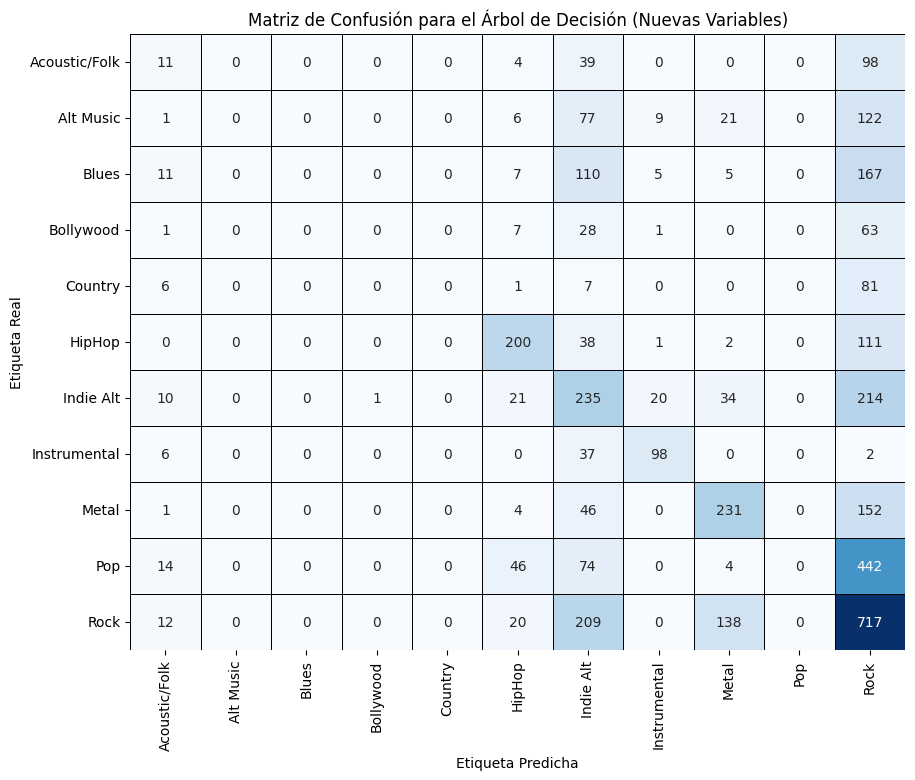

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set using the Python model
# X_test and y_test are already prepared in the previous cell (FLk3kgqhORCH)
dec_tree_result2I = dec_tree2I.predict(X_test)

# Calculate accuracy
accuracy_dt2I = accuracy_score(y_test, dec_tree_result2I)
print(f"Accuracy for Decision Tree with new features: {accuracy_dt2I:.4f}")

# Calculate the confusion matrix
cm_dt2I = confusion_matrix(y_test, dec_tree_result2I)

# Get unique class labels for better visualization
class_labels_dt2I = sorted(y_test.unique())

# Create a DataFrame for the confusion matrix for better labeling
cm_df_dt2I = pd.DataFrame(cm_dt2I, index=class_labels_dt2I, columns=class_labels_dt2I)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_dt2I, annot=True, fmt='d', cmap='Blues', cbar=False,
            linewidths=.5, linecolor='black')
plt.title('Matriz de Confusión para el Árbol de Decisión (Nuevas Variables)')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

Se presenta una caida considerable en la precision pasando de 0.4914 a 0.3704 esto se debe a la eliminacion de varias caracteristicas importantes del conjunto de datos (mode, duration_in, liveness, tempo, loudness). Tiene menos informacion de la cual aprender.

## **KNN**

Probamos el modelo con el Datamodel 3 y las variables originales:



In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming DataModel3 is available from previous cells and was prepared

# Features: All columns except Artist Name, Track Name, Class, and Genre_Name
# Using the same feature set as the best performing RandomForest model (fit3)
features_df_knn = DataModel3.drop(columns=['Artist Name', 'Track Name', 'Class', 'Genre_Name']).copy()
target_knn = DataModel3['Genre_Name']

# Identify numerical columns for imputation and scaling
numerical_cols_knn = features_df_knn.select_dtypes(include=np.number).columns.tolist()

# Impute missing values for numerical features (using median)
imputer_knn = SimpleImputer(strategy='median')
features_df_knn[numerical_cols_knn] = imputer_knn.fit_transform(features_df_knn[numerical_cols_knn])

# Standardize numerical features (equivalent to R's scale())
scaler_knn = StandardScaler()
features_scaled_knn = scaler_knn.fit_transform(features_df_knn[numerical_cols_knn])
features_scaled_df_knn = pd.DataFrame(features_scaled_knn, columns=numerical_cols_knn, index=features_df_knn.index)

# Set random state for reproducibility (equivalent to R's set.seed)
np.random.seed(34)

# Split data into training and testing sets (using the same split as for fit3)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    features_scaled_df_knn, target_knn, test_size=0.3, random_state=34, stratify=target_knn
)

# Initialize and train the K-Nearest Neighbors model
# In R, k=20 was used. Let's start with k=20 here as well.
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train_knn, y_train_knn)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_knn)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"Model Accuracy for KNN on DataModel3: {accuracy_knn:.4f}")

print("KNN model trained successfully.")

Model Accuracy for KNN on DataModel3: 0.5076
KNN model trained successfully.


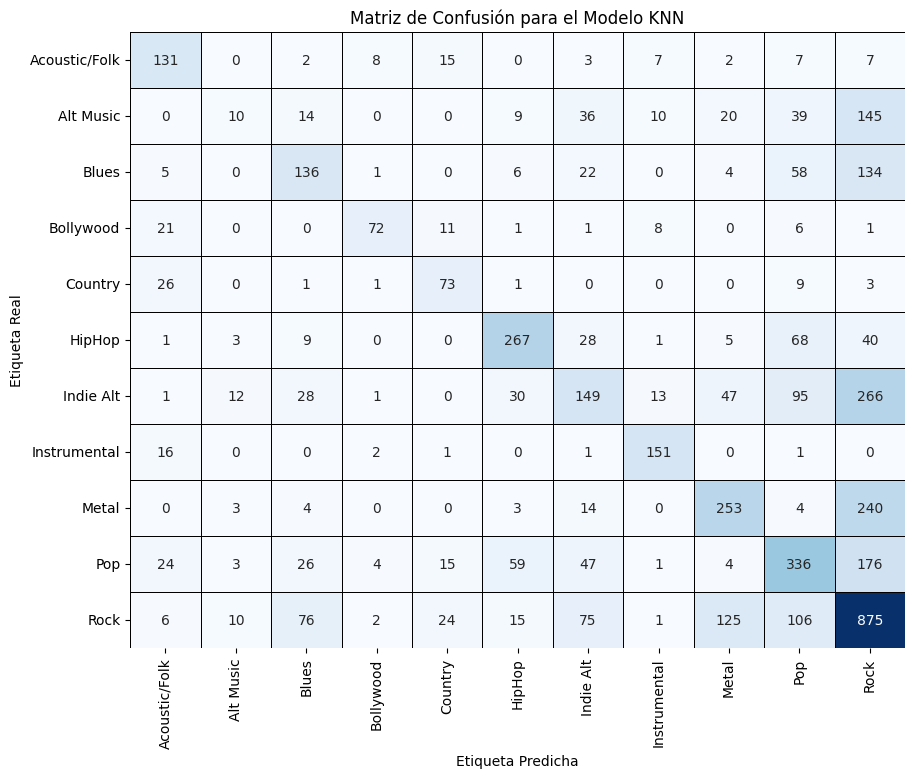

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the KNN model
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)

# Get unique class labels for better visualization
class_labels_knn = sorted(y_test_knn.unique())

# Create a DataFrame for the confusion matrix for better labeling
cm_df_knn = pd.DataFrame(cm_knn, index=class_labels_knn, columns=class_labels_knn)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            linewidths=.5, linecolor='black')
plt.title('Matriz de Confusión para el Modelo KNN')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

Géneros Difíciles de Clasificar: 'Alt Music' y 'Instrumental' tienen el menor número de predicciones correctas, lo que sugiere que son los géneros más difíciles de distinguir para este modelo KNN. Esto podría deberse a que sus características no son lo suficientemente distintivas o a que hay una gran variabilidad dentro de estos géneros que los hace parecerse a otros.

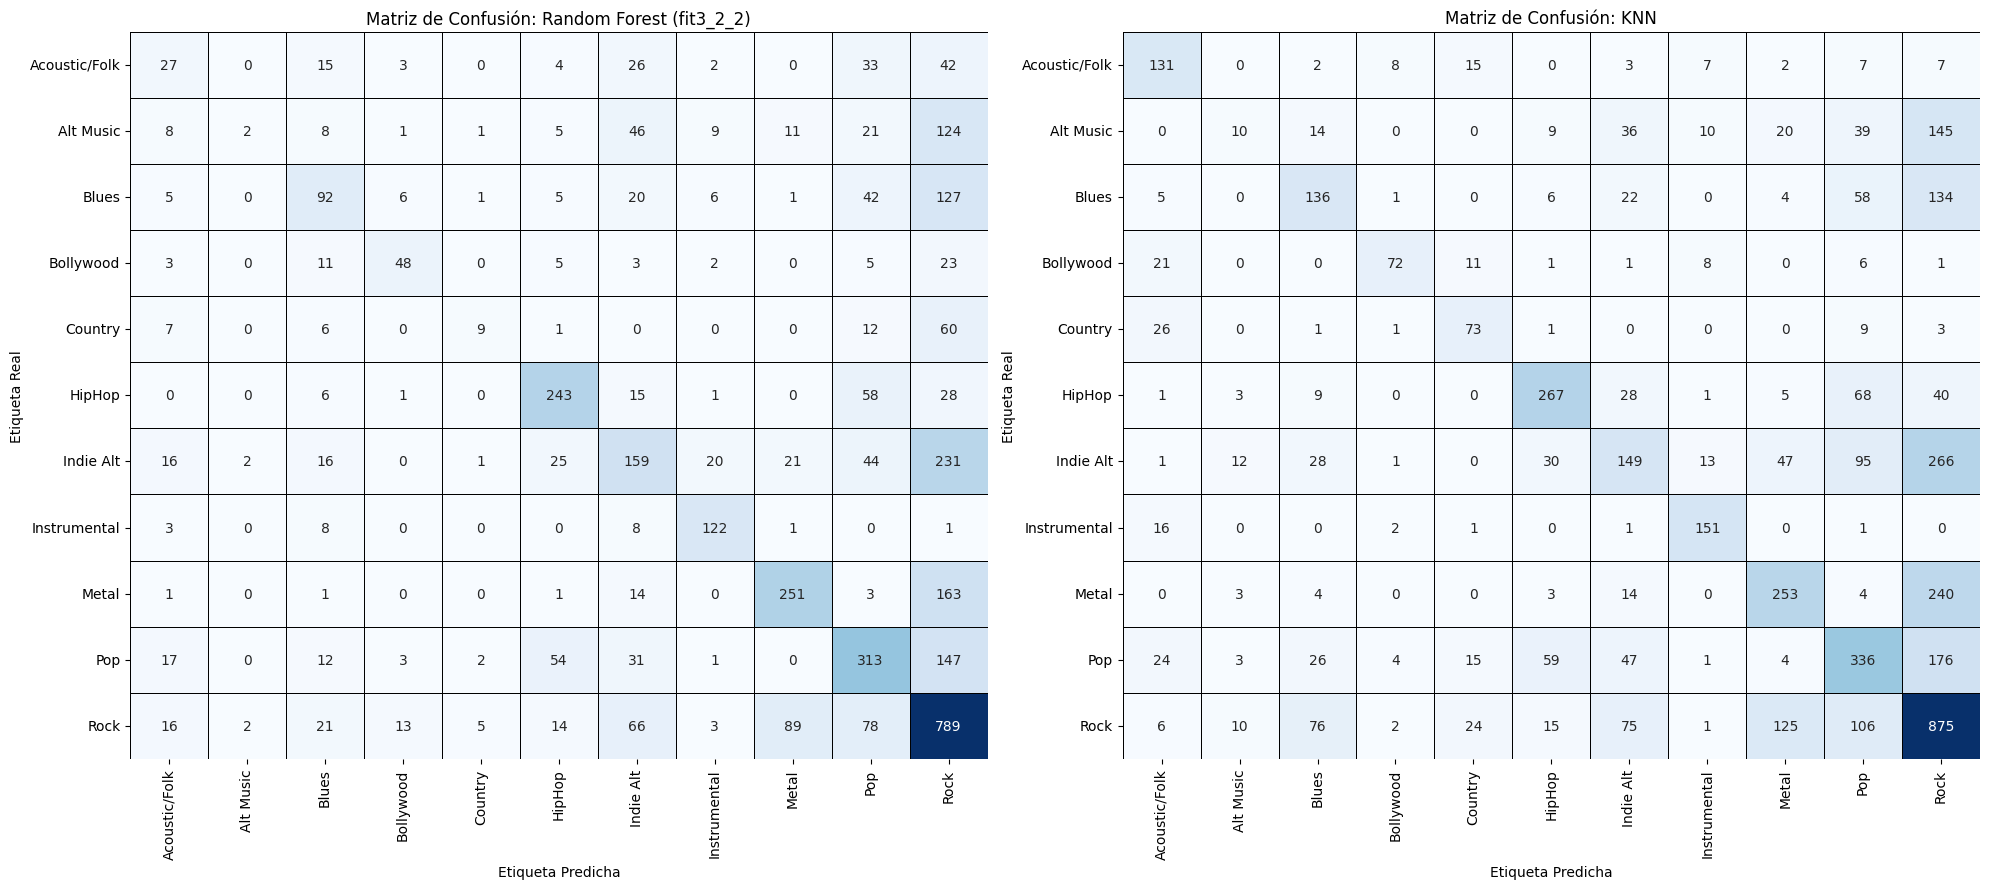

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cm_df_knn (from KNN model) and cm_df (from RandomForest model, specifically fit3_2_2) are available
# from previous executions.

fig, axes = plt.subplots(1, 2, figsize=(20, 9))

# Plot Confusion Matrix for Random Forest (from cell Db-aKYlAcgEB, which used cm_df from fit3_2_2)
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            linewidths=.5, linecolor='black', ax=axes[0])
axes[0].set_title('Matriz de Confusión: Random Forest (fit3_2_2)')
axes[0].set_xlabel('Etiqueta Predicha')
axes[0].set_ylabel('Etiqueta Real')

# Plot Confusion Matrix for KNN (from cell d15c5bdd)
sns.heatmap(cm_df_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            linewidths=.5, linecolor='black', ax=axes[1])
axes[1].set_title('Matriz de Confusión: KNN')
axes[1].set_xlabel('Etiqueta Predicha')
axes[1].set_ylabel('Etiqueta Real')

plt.tight_layout()
plt.show()

+ Random Forest (fit3_2_2): A pesar de que esta versión del Random Forest tuvo una precisión menor (0.5102) debido a la eliminación de variables, su matriz de confusión muestra una concentración más clara en la diagonal para algunos géneros, indicando que cuando acierta, lo hace con mayor confianza para esas categorías.
+ KNN: Con una precisión de 0.5076, el KNN muestra un patrón de clasificación ligeramente más distribuido. Tiende a tener un número de predicciones correctas en la diagonal comparable o a veces mejor que el Random Forest simplificado, pero también distribuye más errores entre una mayor variedad de géneros.

En conclusión, mientras que el Random Forest original (con todas las variables) fue el modelo con mayor precisión (KNN puede mostrar errores más dispersos, lo que significa que un género puede ser confundido con una gama más amplia de otras categorías), al comparar estas versiones simplificadas, ambos modelos exhiben fortalezas y debilidades similares en la clasificación de géneros, especialmente en aquellos con características superpuestas. La elección entre uno y otro podría depender de la tolerancia a ciertos tipos de errores de clasificación.